# Statistical analysis
Understanding the current state of the maintenance program, identifying areas for improvement.




**1). Create a spreadsheet with columns for vehicle ID, type, age, maintenance
cost, and any other relevant output/response variables.**

In [ ]:
import pandas as pd
data=pd.read_csv('AllresultsSep3.csv')

<ipython-input-313-a6c3b46ce34b>:2: DtypeWarning: Columns (20,40,45) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('AllresultsSep3.csv')


In [ ]:
data.columns=['Orderid','Taller','Tallerid','Orden','opened','closed',
             'status','lagdias','laghoras','diacierre','mescierre',
             'aniocierre','diaabierto','mesabierto','anioabierto','creadapor',
        'cerradapor','REPREASON','TipoOrden','proveedor','COMPCDKEY','COMPCODE',
             'DESCRIP','QTYRCVD','QTYREQD','CHGAMT','TAXAMT','SUBTOTAL','TOTAL',
             'Unidad','TipoUnidad','aniounidad','EC','flota','TipoRazon','COMPLAINT',
             'jobcode','TipoLinea','NumParte','FechaPromesa','Estimate','diacomplete',
              'mescomplete','aniocomplete','completedate','MECHANIC','CITA']


In [ ]:
data=data[data.status.str.contains('CLOSED',na=False)]

In [ ]:
print(data[data.jobcode.str.len()<=3].value_counts('jobcode'))

jobcode
-     5324
Name: count, dtype: int64


Columna Para Clasificar el tipo de Mantenimiento

In [ ]:
data['jobcode'] = data.apply(lambda x: x['COMPLAINT'] if len(x['jobcode']) ==3 else x['jobcode'], axis=1)

In [ ]:
def clasificar_trabajo(job):

    job = str(job)
    if 'Preventivo' in job:
        return 'Preventivo'
    if 'PM' in job:
        return 'Preventivo'
    elif 'Correctivo' in job:
        return 'Correctivo'
    elif 'correctivo' in job:
        return 'Correctivo'
    elif 'preventivo' in job:
        return 'Preventivo'
    elif 'Lavado' in job:
        return 'Preventivo'
    elif 'Auxilio' in job:
        return 'Auxilio'
    elif 'auxilio' in job:
        return 'Auxilio'
    elif 'Daño' in job:
        return 'Auxilio'
    elif 'DAÑO' in job:
        return 'Auxilio'
    elif 'daño' in job:
        return 'Auxilio'
    elif 'accidente' in job:
        return 'Auxilio'
    elif 'Accidente' in job:
        return 'Auxilio'
    elif 'Robo' in job:
        return 'Auxilio'
    elif 'robo' in job:
        return 'Auxilio'
    else:
        return 'Correctivo'


data['Tipo'] = data['jobcode'].apply(clasificar_trabajo)


print(data[['jobcode', 'Tipo']].sample(30))

                                          jobcode        Tipo
102797  000005 - Servicio Preventivo Caja Seca A1  Preventivo
59574                 000058 - Preventivo Llantas  Preventivo
56714                 000013 - Correctivo Tractos  Correctivo
160104                    000061 - Daño Operativo     Auxilio
87494                         000034 - In Tractor  Correctivo
40402                  000055 - Acondicionamiento  Correctivo
100102      000053 - Auxilio Carretero - Mecánico     Auxilio
134486                000059 - Correctivo Llantas  Correctivo
14046                                PONCHADO      Correctivo
94791             000001 - Servicio preventivo M1  Preventivo
159035                000013 - Correctivo Tractos  Correctivo
155194                000058 - Preventivo Llantas  Preventivo
49317                       000035 - Out Arrastre  Correctivo
12126                 000013 - Correctivo Tractos  Correctivo
48637                 000013 - Correctivo Tractos  Correctivo
138677  

In [ ]:
print(data[data['Tipo'] == 'Correctivo'][['jobcode', 'Tipo']].sample(30))

                            jobcode        Tipo
64650   000013 - Correctivo Tractos  Correctivo
128806  000059 - Correctivo Llantas  Correctivo
31014             000025 - Especial  Correctivo
33849          000032 - Consumibles  Correctivo
12131   000013 - Correctivo Tractos  Correctivo
170382    000014 - Correctivo Cajas  Correctivo
35768   000013 - Correctivo Tractos  Correctivo
63037   000013 - Correctivo Tractos  Correctivo
118802                 PREVENT VENC  Correctivo
137507  000013 - Correctivo Tractos  Correctivo
105803  000059 - Correctivo Llantas  Correctivo
12962          000032 - Consumibles  Correctivo
26854                  FUGA          Correctivo
55185         000035 - Out Arrastre  Correctivo
53563   000013 - Correctivo Tractos  Correctivo
88432             000025 - Especial  Correctivo
118125    000014 - Correctivo Cajas  Correctivo
4730    000013 - Correctivo Tractos  Correctivo
92975   000013 - Correctivo Tractos  Correctivo
95123   000059 - Correctivo Llantas  Cor

In [ ]:
print(data.jobcode.value_counts())

jobcode
000013 - Correctivo Tractos                  40107
000005 - Servicio Preventivo Caja Seca A1    15019
000029 - Servicio De Lavado                  13007
000058 - Preventivo Llantas                  12756
000059 - Correctivo Llantas                   9278
                                             ...  
AGRIETADO                                        1
000076 - Preventivo compresor de aire            1
FALLA UREA                                       1
AGITADO                                          1
NO ENFRIa                                        1
Name: count, Length: 117, dtype: int64


### Costo promedio por tipo de reparación con total de datos

In [ ]:
promedio_costo = data.groupby('COMPLAINT')['TOTAL'].mean().reset_index()
promedio_costo.rename(columns={'costo': 'costo_promedio'}, inplace=True)
promedio_costo=promedio_costo.sort_values(by='TOTAL', ascending=False) # Sorting by the correct column name

In [ ]:
promedio_costo.head(50)

,COMPLAINT,TOTAL
59,INOPERATIVO,9069.283469
70,MISSING,6811.521408
93,OBSTRUIDO,6806.197273
128,SUMIDO,6434.355000
108,QUEBRADO,5320.811071
76,NO ABASTECE,4796.666667
7,AGRIETADO,4167.705000
121,SIN DIESEL,3922.691358
81,NO CARGA,3670.599250
115,ROBADA,3526.157826


## Proyecto Sayer

In [ ]:
sayer=data[data.flota.str.contains('Sayer Full',na=False)]

Current maintenance costs per vehicle, categorized by vehicle type and age.

Current maintenance costs per failure type.

In [ ]:
promedio_costo_repreason = sayer.groupby('REPREASON')['TOTAL'].mean().reset_index()
lagdias_promedio=sayer.groupby('REPREASON')['lagdias'].mean().reset_index()
promedio_costo_repreason.rename(columns={'TOTAL': 'CostoPromedio'}, inplace=True)
df_merge = pd.merge(promedio_costo_repreason, lagdias_promedio, on='REPREASON')
df_merge

,REPREASON,CostoPromedio,lagdias
0,7 VÍAS DAÑAD,583.561667,0.833333
1,ACC-NO-REPO,2329.160795,8.227273
2,ACC-REPORT,1527.278785,3.424390
3,ACEITE-MOTOR,4524.000000,1.000000
4,ALR,216.334667,1.783333
5,AMORTIGUADOR,1025.428807,3.666667
6,BALATAS,300.000000,0.000000
7,BALEROS,4200.000000,2.000000
8,BATERÍA DAÑA,996.072500,0.000000
9,BATERÍAS,1876.020000,3.000000


In [ ]:
Act2A=sayer[['Unidad','TipoUnidad','aniounidad','TOTAL','lagdias','Orderid']].copy()

In [ ]:
# Filter to maintain quality of data.
for column in Act2A.select_dtypes(include='object').columns:
    Act2A[column] = Act2A[column].apply(lambda x:x.strip())

In [ ]:
# Vista general
Act2A.groupby(['TipoUnidad','aniounidad','Unidad'])['TOTAL'].aggregate('describe').sort_values(by=['aniounidad'], ascending=True)

count         mean          std      min  \
TipoUnidad aniounidad Unidad                                             
TRAILER    2016       10183   128.0  1118.905531  2058.669819     0.00   
                      10190   113.0   758.898673  1256.951820     0.00   
                      10188    78.0   769.217692  1341.735225     0.00   
                      10187    70.0   946.552943  2053.437618     0.00   
                      10186   106.0   746.135000  1294.747770     0.00   
                      10193    71.0  1161.185690  2064.098966     0.00   
                      10181   102.0   701.220000  1162.743537     0.00   
                      10180    63.0   752.148730  1893.318633     0.00   
                      10177    74.0   849.020676  1403.596980     0.00   
                      10176    86.0   735.870233  1149.455775     0.00   
                      10175    83.0   667.673133   917.953096     0.00   
                      10173    77.0   899.464026  1323.722682     0.00   
                      10172    93.0   755.264645  1544.042400     0.00   
                      10171    58.0   647.866621  1818.905227     0.00   
                      10195    35.0   875.739714   786.652423    76.72   
                      10196    51.0   837.544118  1141.001003     0.00   
                      10197    88.0  1014.472545  2085.180727     0.00   
                      10191    40.0  1204.711500  1758.068031     0.00   
                      10192    80.0   752.093250  1315.059403     0.00   
           2018       10207    55.0   945.605636  2096.625398    13.76   
                      10211    64.0   849.983594  1875.598490     0.00   
                      10213    80.0   993.937625  1417.441573     0.00   
                      10216    63.0   781.651270  1241.746001     0.00   
                      10221    50.0  1321.713300  1622.738087     8.93   
                      10223    65.0  1029.558615  1958.808156     8.26   
           2019       10224    64.0   676.022063  1054.353019     0.00   
                      10231    30.0  1674.191667  1688.781030     0.00   
                      10232    60.0   590.009333   963.802968     0.00   
                      10244    88.0   696.742318  1075.279263     0.00   
                      10248    64.0   748.185625  1252.257757     6.95   
                      10249    70.0   943.079571  1481.072695     0.00   
                      10255    64.0   810.650469  1517.745938     0.00   
                      53846     1.0  1000.000000          NaN  1000.00   
                      10258    52.0   828.880038  1269.012512     0.00   
TRACTOR    2021       1834    517.0  1083.788708  1854.943131    -8.24   
                      1808    549.0  1188.048608  2792.771894  -530.52   
                      1805    643.0  1277.161585  2524.066582  -530.52   
                      1803    648.0  1195.297542  2838.641620  -991.32   
                      1801    571.0  1385.064219  2440.071144     0.00   
                      1800    590.0  1499.952542  3328.269889  -530.52   
                      1799    537.0  1215.130695  2375.509476     0.00   
DOLLY      2022       D-2164  108.0   781.557222  1661.950305     0.00   
                      D-2165   89.0  1417.564944  4510.738149     1.16   
                      D-2168  111.0  1234.889820  2617.906086     0.00   
                      D-2169   73.0  1050.975521  2577.977917     1.98   
                      D-2187  108.0  1191.022963  1482.763737     0.00   
                      D-2172  162.0  1004.680926  3661.436556     0.00   
                      D-2175  122.0  1018.540410  1533.140873     2.93   
                      D-2188  111.0  1084.563333  1812.197536     0.00   
                      D-2170  100.0   730.593980  1445.428402     0.00   
                      D-2161   93.0   842.469570  1469.545736     8.67   

                                    25%        50%        75%       max  
TipoUnidad aniounidad Unidad     

In [ ]:
#Por antiguedad
Act2A.groupby(['aniounidad'])['TOTAL'].aggregate('describe').sort_values(by=['aniounidad'], ascending=True)

,count,mean,std,min,25%,50%,75%,max
aniounidad,,,,,,,,
2016,1496.0,845.773020,1552.509315,0.00,76.71,250.00,905.500,13912.80
2018,377.0,976.586936,1708.514226,0.00,103.44,300.00,1200.000,13441.72
2019,493.0,811.537298,1286.790060,0.00,64.10,200.00,1000.000,7092.80
2021,4055.0,1266.755612,2644.995990,-991.32,60.00,261.31,1338.025,45000.00
2022,1077.0,1032.322898,2514.541601,0.00,74.48,360.00,1000.000,44379.98


In [ ]:
# Por tipo de unidad
Act2A.groupby('TipoUnidad')['TOTAL'].aggregate('describe')

,count,mean,std,min,25%,50%,75%,max
TipoUnidad,,,,,,,,
DOLLY,1077.0,1032.322898,2514.541601,0.00,74.4800,360.00,1000.000,44379.98
TRACTOR,4055.0,1266.755612,2644.995990,-991.32,60.0000,261.31,1338.025,45000.00
TRAILER,2366.0,859.483348,1528.057577,0.00,76.9375,250.00,1000.000,13912.80


### Historical data on vehicle maintenance divided by quarters of each year.

**Failure Rate:** Frequency of equipment failures over a specified period.

In [ ]:
# Quality of values in columns
for column in sayer.select_dtypes(include='object').columns:
    sayer[column] = sayer[column].apply(lambda x:x.strip() if isinstance(x, str) else x)

<ipython-input-330-8e8ae9ddbe8c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sayer[column] = sayer[column].apply(lambda x:x.strip() if isinstance(x, str) else x)


In [ ]:
# Convertir completedate en un datetime
sayer['completedate'] = pd.to_datetime(sayer['completedate'], dayfirst=True,errors='coerce')

<ipython-input-331-ec1edbb238ba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sayer['completedate'] = pd.to_datetime(sayer['completedate'], dayfirst=True,errors='coerce')


In [ ]:
# Lo dividimos por trimestre
sayer['year'] = sayer['completedate'].dt.year
sayer['quarter'] = sayer['completedate'].dt.quarter

year_2022_q1_data = sayer[(sayer['year'] == 2022) & (sayer['quarter'] == 1)]
year_2022_q2_data = sayer[(sayer['year'] == 2023) & (sayer['quarter'] == 2)]
year_2022_q3_data = sayer[(sayer['year'] == 2022) & (sayer['quarter'] == 3)]
year_2022_q4_data = sayer[(sayer['year'] == 2022) & (sayer['quarter'] == 4)]
year_2023_q1_data = sayer[(sayer['year'] == 2023) & (sayer['quarter'] == 1)]
year_2023_q2_data = sayer[(sayer['year'] == 2023) & (sayer['quarter'] == 2)]
year_2023_q3_data = sayer[(sayer['year'] == 2023) & (sayer['quarter'] == 3)]
year_2023_q4_data = sayer[(sayer['year'] == 2023) & (sayer['quarter'] == 4)]
year_2024_q1_data = sayer[(sayer['year'] == 2024) & (sayer['quarter'] == 1)]
year_2024_q2_data = sayer[(sayer['year'] == 2024) & (sayer['quarter'] == 2)]
year_2024_q3_data = sayer[(sayer['year'] == 2024) & (sayer['quarter'] == 3)]

<ipython-input-332-58814251e1fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sayer['year'] = sayer['completedate'].dt.year
<ipython-input-332-58814251e1fa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sayer['quarter'] = sayer['completedate'].dt.quarter


### Failure rate
**2022, first Quarter**



In [ ]:
year_2022_q1=year_2022_q1_data[year_2022_q1_data.TipoRazon.str.contains('MAINTENANCE REPAIR',na=False)]
year_2022_q1.drop_duplicates(subset='completedate',inplace=True)
for index, row in year_2022_q1['Unidad'].value_counts().items():
    print(index,':',row/len(year_2022_q1_data.Unidad.unique())*100,'%')

<ipython-input-333-0208d1f32517>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_2022_q1.drop_duplicates(subset='completedate',inplace=True)


1805 : 13.513513513513514 %
1803 : 10.81081081081081 %
10181 : 8.108108108108109 %
10232 : 8.108108108108109 %
1808 : 8.108108108108109 %
10207 : 5.405405405405405 %
D-2172 : 5.405405405405405 %
10186 : 5.405405405405405 %
10223 : 5.405405405405405 %
D-2165 : 5.405405405405405 %
10248 : 5.405405405405405 %
D-2170 : 5.405405405405405 %
1801 : 2.7027027027027026 %
10173 : 2.7027027027027026 %
D-2168 : 2.7027027027027026 %
D-2187 : 2.7027027027027026 %
10196 : 2.7027027027027026 %
10244 : 2.7027027027027026 %
10191 : 2.7027027027027026 %
10192 : 2.7027027027027026 %
10180 : 2.7027027027027026 %
10190 : 2.7027027027027026 %
10221 : 2.7027027027027026 %
1800 : 2.7027027027027026 %
10211 : 2.7027027027027026 %
D-2175 : 2.7027027027027026 %
D-2164 : 2.7027027027027026 %
10249 : 2.7027027027027026 %
10231 : 2.7027027027027026 %


**2022, second Quarter**

In [ ]:
year_2022_q2=year_2022_q2_data[year_2022_q2_data.TipoRazon.str.contains('MAINTENANCE REPAIR',na=False)]
year_2022_q2.drop_duplicates(subset='completedate',inplace=True)
for index, row in year_2022_q2['Unidad'].value_counts().items():
    print(index,':',row/len(year_2022_q2_data.Unidad.unique())*100,'%')
year_2022_q2.drop_duplicates(subset='completedate',inplace=True)

1808 : 14.285714285714285 %
1801 : 8.571428571428571 %
D-2164 : 8.571428571428571 %
1805 : 8.571428571428571 %
1799 : 8.571428571428571 %
D-2170 : 8.571428571428571 %
1834 : 5.714285714285714 %
10196 : 5.714285714285714 %
D-2168 : 5.714285714285714 %
10188 : 5.714285714285714 %
10211 : 5.714285714285714 %
10216 : 5.714285714285714 %
10177 : 5.714285714285714 %
D-2188 : 5.714285714285714 %
1800 : 5.714285714285714 %
10173 : 5.714285714285714 %
10175 : 5.714285714285714 %
D-2169 : 2.857142857142857 %
D-2172 : 2.857142857142857 %
10221 : 2.857142857142857 %
10232 : 2.857142857142857 %
10231 : 2.857142857142857 %
10172 : 2.857142857142857 %
10183 : 2.857142857142857 %
10207 : 2.857142857142857 %
10192 : 2.857142857142857 %
10176 : 2.857142857142857 %
D-2187 : 2.857142857142857 %
10223 : 2.857142857142857 %


<ipython-input-334-2136ff1df28a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_2022_q2.drop_duplicates(subset='completedate',inplace=True)
<ipython-input-334-2136ff1df28a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_2022_q2.drop_duplicates(subset='completedate',inplace=True)


**2022, third Quarter**

In [ ]:
year_2022_q3=year_2022_q3_data[year_2022_q3_data.TipoRazon.str.contains('MAINTENANCE REPAIR',na=False)]
year_2022_q3.drop_duplicates(subset='completedate',inplace=True)
for index, row in year_2022_q3['Unidad'].value_counts().items():
    print(index,':',row/len(year_2022_q3_data.Unidad.unique())*100,'%')

1805 : 17.142857142857142 %
D-2164 : 8.571428571428571 %
10180 : 8.571428571428571 %
10255 : 8.571428571428571 %
1799 : 8.571428571428571 %
10186 : 5.714285714285714 %
1801 : 5.714285714285714 %
10213 : 5.714285714285714 %
D-2161 : 5.714285714285714 %
10191 : 2.857142857142857 %
D-2172 : 2.857142857142857 %
10223 : 2.857142857142857 %
10188 : 2.857142857142857 %
10175 : 2.857142857142857 %
10216 : 2.857142857142857 %
10183 : 2.857142857142857 %
10244 : 2.857142857142857 %
1808 : 2.857142857142857 %
10193 : 2.857142857142857 %
D-2188 : 2.857142857142857 %
D-2187 : 2.857142857142857 %
10232 : 2.857142857142857 %
1800 : 2.857142857142857 %
10190 : 2.857142857142857 %
10207 : 2.857142857142857 %
10248 : 2.857142857142857 %
10181 : 2.857142857142857 %
10192 : 2.857142857142857 %
10171 : 2.857142857142857 %
D-2175 : 2.857142857142857 %


<ipython-input-335-10d3e946ae30>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_2022_q3.drop_duplicates(subset='completedate',inplace=True)


**2022, Fourth Quarter**

In [ ]:
year_2022_q4=year_2022_q4_data[year_2022_q4_data.TipoRazon.str.contains('MAINTENANCE REPAIR',na=False)]
year_2022_q4.drop_duplicates(subset='completedate',inplace=True)
for index, row in year_2022_q4['Unidad'].value_counts().items():
    print(index,':',row/len(year_2022_q4_data.Unidad.unique())*100,'%')

10196 : 12.5 %
1803 : 12.5 %
10176 : 10.0 %
10175 : 10.0 %
10173 : 10.0 %
10207 : 10.0 %
10192 : 10.0 %
1808 : 10.0 %
10177 : 7.5 %
10232 : 7.5 %
D-2161 : 7.5 %
10180 : 5.0 %
D-2168 : 5.0 %
10195 : 5.0 %
D-2165 : 5.0 %
1801 : 5.0 %
10191 : 5.0 %
10248 : 5.0 %
1800 : 5.0 %
10221 : 2.5 %
D-2175 : 2.5 %
1834 : 2.5 %
10193 : 2.5 %
10197 : 2.5 %
10255 : 2.5 %
1799 : 2.5 %
D-2187 : 2.5 %
10186 : 2.5 %
D-2164 : 2.5 %
10213 : 2.5 %
D-2169 : 2.5 %
10249 : 2.5 %
10181 : 2.5 %
1805 : 2.5 %


<ipython-input-336-88571dc3d46f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_2022_q4.drop_duplicates(subset='completedate',inplace=True)


**2023, First Quarter**

In [ ]:
year_2023_q1=year_2023_q1_data[year_2023_q1_data.TipoRazon.str.contains('MAINTENANCE REPAIR',na=False)]
year_2023_q1.drop_duplicates(subset='completedate',inplace=True)
for index, row in year_2023_q1['Unidad'].value_counts().items():
    print(index,':',row/len(year_2023_q1_data.Unidad.unique())*100,'%')

<ipython-input-337-e0caa90cfcfa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_2023_q1.drop_duplicates(subset='completedate',inplace=True)


1805 : 8.571428571428571 %
10181 : 8.571428571428571 %
10172 : 8.571428571428571 %
10186 : 8.571428571428571 %
D-2170 : 5.714285714285714 %
10196 : 5.714285714285714 %
1834 : 5.714285714285714 %
10188 : 5.714285714285714 %
1801 : 5.714285714285714 %
D-2161 : 5.714285714285714 %
10213 : 5.714285714285714 %
D-2168 : 2.857142857142857 %
D-2172 : 2.857142857142857 %
1803 : 2.857142857142857 %
D-2187 : 2.857142857142857 %
D-2165 : 2.857142857142857 %
10175 : 2.857142857142857 %
10190 : 2.857142857142857 %
10221 : 2.857142857142857 %
10180 : 2.857142857142857 %
1800 : 2.857142857142857 %
1799 : 2.857142857142857 %
D-2169 : 2.857142857142857 %
10223 : 2.857142857142857 %
10187 : 2.857142857142857 %
10216 : 2.857142857142857 %
10177 : 2.857142857142857 %
10197 : 2.857142857142857 %


**2023, Second Quarter**

In [ ]:
year_2023_q2=year_2023_q2_data[year_2023_q2_data.TipoRazon.str.contains('MAINTENANCE REPAIR',na=False)]
year_2023_q2.drop_duplicates(subset='completedate',inplace=True)
for index, row in year_2023_q2['Unidad'].value_counts().items():
    print(index,':',row/len(year_2023_q2_data.Unidad.unique())*100,'%')

<ipython-input-338-6fa05a33120e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_2023_q2.drop_duplicates(subset='completedate',inplace=True)


1808 : 14.285714285714285 %
1801 : 8.571428571428571 %
D-2164 : 8.571428571428571 %
1805 : 8.571428571428571 %
1799 : 8.571428571428571 %
D-2170 : 8.571428571428571 %
1834 : 5.714285714285714 %
10196 : 5.714285714285714 %
D-2168 : 5.714285714285714 %
10188 : 5.714285714285714 %
10211 : 5.714285714285714 %
10216 : 5.714285714285714 %
10177 : 5.714285714285714 %
D-2188 : 5.714285714285714 %
1800 : 5.714285714285714 %
10173 : 5.714285714285714 %
10175 : 5.714285714285714 %
D-2169 : 2.857142857142857 %
D-2172 : 2.857142857142857 %
10221 : 2.857142857142857 %
10232 : 2.857142857142857 %
10231 : 2.857142857142857 %
10172 : 2.857142857142857 %
10183 : 2.857142857142857 %
10207 : 2.857142857142857 %
10192 : 2.857142857142857 %
10176 : 2.857142857142857 %
D-2187 : 2.857142857142857 %
10223 : 2.857142857142857 %


**2023, Third Quarter**

In [ ]:
year_2023_q3=year_2023_q3_data[year_2023_q3_data.TipoRazon.str.contains('MAINTENANCE REPAIR',na=False)]
year_2023_q3.drop_duplicates(subset='completedate',inplace=True)
for index, row in year_2023_q3['Unidad'].value_counts().items():
    print(index,':',row/len(year_2023_q3_data.Unidad.unique())*100,'%')

1800 : 13.333333333333334 %
1834 : 13.333333333333334 %
1799 : 10.0 %
1805 : 10.0 %
10192 : 10.0 %
1803 : 6.666666666666667 %
10181 : 6.666666666666667 %
10188 : 6.666666666666667 %
D-2187 : 6.666666666666667 %
D-2188 : 3.3333333333333335 %
D-2164 : 3.3333333333333335 %
10207 : 3.3333333333333335 %
10176 : 3.3333333333333335 %
10187 : 3.3333333333333335 %
D-2168 : 3.3333333333333335 %
10197 : 3.3333333333333335 %
10177 : 3.3333333333333335 %
D-2169 : 3.3333333333333335 %
10183 : 3.3333333333333335 %
1808 : 3.3333333333333335 %
D-2170 : 3.3333333333333335 %
D-2165 : 3.3333333333333335 %
10223 : 3.3333333333333335 %


<ipython-input-339-40a13ed992fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_2023_q3.drop_duplicates(subset='completedate',inplace=True)


**2023, Fourth Quarter**

In [ ]:
year_2023_q4=year_2023_q4_data[year_2023_q4_data.TipoRazon.str.contains('MAINTENANCE REPAIR',na=False)]
year_2023_q4.drop_duplicates(subset='completedate',inplace=True)
for index, row in year_2023_q4['Unidad'].value_counts().items():
    print(index,':',row/len(year_2023_q4_data.Unidad.unique())*100,'%')

1800 : 18.75 %
1801 : 12.5 %
1808 : 12.5 %
10195 : 9.375 %
1834 : 6.25 %
10232 : 6.25 %
D-2175 : 6.25 %
D-2187 : 3.125 %
D-2169 : 3.125 %
10193 : 3.125 %
1799 : 3.125 %
1805 : 3.125 %
10224 : 3.125 %
10188 : 3.125 %
1803 : 3.125 %
10171 : 3.125 %
10223 : 3.125 %
10192 : 3.125 %
10231 : 3.125 %
10183 : 3.125 %
10190 : 3.125 %
D-2165 : 3.125 %
D-2170 : 3.125 %


<ipython-input-340-c8bba3d3fd85>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_2023_q4.drop_duplicates(subset='completedate',inplace=True)


**2024, First Quarter**

In [ ]:
year_2024_q1=year_2024_q1_data[year_2024_q1_data.TipoRazon.str.contains('MAINTENANCE REPAIR',na=False)]
year_2024_q1.drop_duplicates(subset='completedate',inplace=True)
for index, row in year_2024_q1['Unidad'].value_counts().items():
    print(index,':',row/len(year_2024_q1_data.Unidad.unique())*100,'%')

10191 : 13.043478260869565 %
10192 : 8.695652173913043 %
1799 : 8.695652173913043 %
D-2188 : 8.695652173913043 %
10183 : 8.695652173913043 %
10232 : 8.695652173913043 %
10181 : 8.695652173913043 %
D-2164 : 4.3478260869565215 %
D-2169 : 4.3478260869565215 %
10197 : 4.3478260869565215 %
10221 : 4.3478260869565215 %
10258 : 4.3478260869565215 %
D-2165 : 4.3478260869565215 %
10187 : 4.3478260869565215 %
D-2170 : 4.3478260869565215 %
D-2168 : 4.3478260869565215 %
10216 : 4.3478260869565215 %
10213 : 4.3478260869565215 %
10176 : 4.3478260869565215 %
10175 : 4.3478260869565215 %
10196 : 4.3478260869565215 %


<ipython-input-341-85db1b308e16>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_2024_q1.drop_duplicates(subset='completedate',inplace=True)


**2024, Second Quarter**

In [ ]:
year_2024_q2=year_2024_q2_data[year_2024_q2_data.TipoRazon.str.contains('MAINTENANCE REPAIR',na=False)]
year_2024_q2.drop_duplicates(subset='completedate',inplace=True)
for index, row in year_2024_q2['Unidad'].value_counts().items():
    print(index,':',row/len(year_2024_q2_data.Unidad.unique())*100,'%')

<ipython-input-342-4af341c16a3a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_2024_q2.drop_duplicates(subset='completedate',inplace=True)


1834 : 9.67741935483871 %
1801 : 9.67741935483871 %
10181 : 9.67741935483871 %
D-2187 : 6.451612903225806 %
10223 : 6.451612903225806 %
10216 : 6.451612903225806 %
1799 : 6.451612903225806 %
10211 : 6.451612903225806 %
10177 : 3.225806451612903 %
10258 : 3.225806451612903 %
10195 : 3.225806451612903 %
10192 : 3.225806451612903 %
1805 : 3.225806451612903 %
10244 : 3.225806451612903 %
10213 : 3.225806451612903 %
10172 : 3.225806451612903 %
D-2164 : 3.225806451612903 %
10221 : 3.225806451612903 %
10188 : 3.225806451612903 %
10197 : 3.225806451612903 %
10187 : 3.225806451612903 %
10190 : 3.225806451612903 %
D-2168 : 3.225806451612903 %
1803 : 3.225806451612903 %
10175 : 3.225806451612903 %
1800 : 3.225806451612903 %
10183 : 3.225806451612903 %
D-2175 : 3.225806451612903 %


**2024, Third Quarter**

In [ ]:
year_2024_q3=year_2024_q3_data[year_2024_q3_data.TipoRazon.str.contains('MAINTENANCE REPAIR',na=False)]
year_2024_q3.drop_duplicates(subset='completedate',inplace=True)
for index, row in year_2024_q3['Unidad'].value_counts().items():
    print(index,':',row/len(year_2024_q3_data.Unidad.unique())*100,'%')

1805 : 9.67741935483871 %
10197 : 6.451612903225806 %
1834 : 6.451612903225806 %
D-2168 : 6.451612903225806 %
D-2161 : 6.451612903225806 %
10211 : 6.451612903225806 %
10213 : 6.451612903225806 %
10187 : 6.451612903225806 %
10181 : 6.451612903225806 %
10196 : 6.451612903225806 %
1800 : 6.451612903225806 %
1799 : 6.451612903225806 %
10223 : 6.451612903225806 %
10216 : 3.225806451612903 %
10177 : 3.225806451612903 %
10175 : 3.225806451612903 %
1803 : 3.225806451612903 %
D-2169 : 3.225806451612903 %
1808 : 3.225806451612903 %
1801 : 3.225806451612903 %
D-2165 : 3.225806451612903 %
10188 : 3.225806451612903 %
10192 : 3.225806451612903 %
D-2188 : 3.225806451612903 %
10193 : 3.225806451612903 %
10186 : 3.225806451612903 %
10249 : 3.225806451612903 %
10176 : 3.225806451612903 %
10190 : 3.225806451612903 %


<ipython-input-343-558a8846ac99>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_2024_q3.drop_duplicates(subset='completedate',inplace=True)


In [ ]:
sayerPreventivo=sayer[sayer.Tipo=='Preventivo']
sayerCorrectivo=sayer[sayer.Tipo=='Correctivo']

In [ ]:
sayerPreventivo.jobcode.unique()

array(['000041 - Servicio Preventivo A - LT',
       '000029 - Servicio De Lavado', '000058 - Preventivo Llantas',
       '000005 - Servicio Preventivo Caja Seca A1',
       '000042 - Servicio Preventivo B - LT',
       '000007 - Servicio Preventivo Dolly A1', 'PM',
       '000043 - Servicio Preventivo C - LT',
       '000073 - Derivado de preventivo Tracto',
       '000074 - Derivado de preventivo Arrastre',
       '000001 - Servicio preventivo M1'], dtype=object)

In [ ]:
sayerCorrectivo.jobcode.unique()

array(['000013 - Correctivo Tractos', 'DESGASTADO',
       '000014 - Correctivo Cajas', '000018 - Correctivo Dolly',
       'LLANTA VOLAD', '000063 - In Dolly', '000059 - Correctivo Llantas',
       'PONCHADO', 'PRESIÓN BAJA', '000036 - In Arrastre',
       '000034 - In Tractor', '000055 - Acondicionamiento',
       'PIERDE POTEN', '000025 - Especial', '000057 - Informativos',
       '000032 - Consumibles', 'OTROS', 'CORRECTIVO', 'ROTO', 'NO INFLA',
       '000028 - Garantias', 'PREVENT VENC', 'SUCIO', '000050 - SH 3',
       'DESGASTE IRR', 'REP LLANTA', 'FALLA UREA',
       'ORDERSEC.COMPLAINT jr'], dtype=object)

In [ ]:
sayer[sayer.Tipo=='Auxilio'].jobcode.unique()

array(['000053 - Auxilio Carretero - Mecánico', '000061 - Daño Operativo',
       '000027 - Auxilio Carretero - Llantas', '000060 - Robo', 'DAÑO OP',
       '000026 - Accidente', '000054 - Auxilio Carretero- Abastecimiento',
       '000062 - Daño Operativo Llanta'], dtype=object)

In [ ]:
sayerPreventivo.head(20)

,Orderid,Taller,Tallerid,Orden,opened,closed,status,lagdias,laghoras,diacierre,...,Estimate,diacomplete,mescomplete,aniocomplete,completedate,MECHANIC,CITA,Tipo,year,quarter
109,169137,QRO,QRO-00032562,244708.0,2022-01-03 13:34:00.000,2022-02-10 15:18:00.000,CLOSED,38.0,914.0,10.0,...,NaN,10.0,February,2022.0,2022-10-02 15:18:00,NaN,CON CITA,Preventivo,2022.0,4.0
110,169137,QRO,QRO-00032562,244708.0,2022-01-03 13:34:00.000,2022-02-10 15:18:00.000,CLOSED,38.0,914.0,10.0,...,NaN,10.0,February,2022.0,2022-10-02 15:18:00,NaN,CON CITA,Preventivo,2022.0,4.0
111,169137,QRO,QRO-00032562,244708.0,2022-01-03 13:34:00.000,2022-02-10 15:18:00.000,CLOSED,38.0,914.0,10.0,...,NaN,10.0,February,2022.0,2022-10-02 15:18:00,NaN,CON CITA,Preventivo,2022.0,4.0
112,169137,QRO,QRO-00032562,244708.0,2022-01-03 13:34:00.000,2022-02-10 15:18:00.000,CLOSED,38.0,914.0,10.0,...,NaN,10.0,February,2022.0,2022-10-02 15:18:00,NaN,CON CITA,Preventivo,2022.0,4.0
113,169137,QRO,QRO-00032562,244708.0,2022-01-03 13:34:00.000,2022-02-10 15:18:00.000,CLOSED,38.0,914.0,10.0,...,NaN,10.0,February,2022.0,2022-10-02 15:18:00,NaN,CON CITA,Preventivo,2022.0,4.0
114,169137,QRO,QRO-00032562,244708.0,2022-01-03 13:34:00.000,2022-02-10 15:18:00.000,CLOSED,38.0,914.0,10.0,...,NaN,10.0,February,2022.0,2022-10-02 15:18:00,NaN,CON CITA,Preventivo,2022.0,4.0
115,169137,QRO,QRO-00032562,244708.0,2022-01-03 13:34:00.000,2022-02-10 15:18:00.000,CLOSED,38.0,914.0,10.0,...,NaN,10.0,February,2022.0,2022-10-02 15:18:00,NaN,CON CITA,Preventivo,2022.0,4.0
548,169540,QRO,QRO-00032631,NaN,2022-01-05 09:00:00.000,2022-01-19 16:43:00.000,CLOSED,14.0,343.0,19.0,...,NaN,6.0,January,2022.0,2022-06-01 12:50:00,NaN,CON CITA,Preventivo,2022.0,2.0
1787,170888,QRO,QRO-00032732,NaN,2022-01-14 09:50:00.000,2022-01-14 12:45:00.000,CLOSED,0.0,3.0,14.0,...,NaN,14.0,January,2022.0,NaT,NaN,,Preventivo,NaN,NaN
2195,171175,QRO,QRO-00032747,345987.0,2022-01-17 10:17:00.000,2022-01-17 15:33:00.000,CLOSED,0.0,5.0,17.0,...,NaN,17.0,January,2022.0,NaT,NaN,SIN CITA,Preventivo,NaN,NaN


###FrecuenciaUnidad

In [ ]:
#Para Sayer Original
sayerOrderid=sayer[['Unidad','Orderid']]
sayerOrderid=sayerOrderid.groupby(['Unidad','Orderid']).count()
sayerOrderid.reset_index(inplace=True)
sayerOrderid['FrecuenciaUnidad'] = sayerOrderid.groupby('Unidad')['Orderid'].cumcount()+1
sayer=sayer.merge(sayerOrderid[['Unidad','Orderid','FrecuenciaUnidad']], on=['Unidad','Orderid'], how='left')
sayer.head()

,Orderid,Taller,Tallerid,Orden,opened,closed,status,lagdias,laghoras,diacierre,...,diacomplete,mescomplete,aniocomplete,completedate,MECHANIC,CITA,Tipo,year,quarter,FrecuenciaUnidad
0,169137,QRO,QRO-00032562,244708.0,2022-01-03 13:34:00.000,2022-02-10 15:18:00.000,CLOSED,38.0,914.0,10.0,...,10.0,February,2022.0,2022-10-02 15:18:00,NaN,CON CITA,Correctivo,2022.0,4.0,1
1,169137,QRO,QRO-00032562,244708.0,2022-01-03 13:34:00.000,2022-02-10 15:18:00.000,CLOSED,38.0,914.0,10.0,...,10.0,February,2022.0,2022-10-02 15:18:00,NaN,CON CITA,Preventivo,2022.0,4.0,1
2,169137,QRO,QRO-00032562,244708.0,2022-01-03 13:34:00.000,2022-02-10 15:18:00.000,CLOSED,38.0,914.0,10.0,...,10.0,February,2022.0,2022-10-02 15:18:00,NaN,CON CITA,Preventivo,2022.0,4.0,1
3,169137,QRO,QRO-00032562,244708.0,2022-01-03 13:34:00.000,2022-02-10 15:18:00.000,CLOSED,38.0,914.0,10.0,...,10.0,February,2022.0,2022-10-02 15:18:00,NaN,CON CITA,Preventivo,2022.0,4.0,1
4,169137,QRO,QRO-00032562,244708.0,2022-01-03 13:34:00.000,2022-02-10 15:18:00.000,CLOSED,38.0,914.0,10.0,...,10.0,February,2022.0,2022-10-02 15:18:00,NaN,CON CITA,Preventivo,2022.0,4.0,1


In [ ]:
#Para Sayer Preventivo
sayerOrderid_prev=sayerPreventivo[['Unidad','Orderid']]
sayerOrderid_prev=sayerOrderid_prev.groupby(['Unidad','Orderid']).count()
sayerOrderid_prev.reset_index(inplace=True)
sayerOrderid_prev['FrecuenciaUnidad'] = sayerOrderid_prev.groupby('Unidad')['Orderid'].cumcount() + 1
sayerPreventivo=sayerPreventivo.merge(sayerOrderid_prev[['Unidad','Orderid','FrecuenciaUnidad']], on=['Unidad','Orderid'], how='left')
sayerPreventivo.head()

,Orderid,Taller,Tallerid,Orden,opened,closed,status,lagdias,laghoras,diacierre,...,diacomplete,mescomplete,aniocomplete,completedate,MECHANIC,CITA,Tipo,year,quarter,FrecuenciaUnidad
0,169137,QRO,QRO-00032562,244708.0,2022-01-03 13:34:00.000,2022-02-10 15:18:00.000,CLOSED,38.0,914.0,10.0,...,10.0,February,2022.0,2022-10-02 15:18:00,NaN,CON CITA,Preventivo,2022.0,4.0,1
1,169137,QRO,QRO-00032562,244708.0,2022-01-03 13:34:00.000,2022-02-10 15:18:00.000,CLOSED,38.0,914.0,10.0,...,10.0,February,2022.0,2022-10-02 15:18:00,NaN,CON CITA,Preventivo,2022.0,4.0,1
2,169137,QRO,QRO-00032562,244708.0,2022-01-03 13:34:00.000,2022-02-10 15:18:00.000,CLOSED,38.0,914.0,10.0,...,10.0,February,2022.0,2022-10-02 15:18:00,NaN,CON CITA,Preventivo,2022.0,4.0,1
3,169137,QRO,QRO-00032562,244708.0,2022-01-03 13:34:00.000,2022-02-10 15:18:00.000,CLOSED,38.0,914.0,10.0,...,10.0,February,2022.0,2022-10-02 15:18:00,NaN,CON CITA,Preventivo,2022.0,4.0,1
4,169137,QRO,QRO-00032562,244708.0,2022-01-03 13:34:00.000,2022-02-10 15:18:00.000,CLOSED,38.0,914.0,10.0,...,10.0,February,2022.0,2022-10-02 15:18:00,NaN,CON CITA,Preventivo,2022.0,4.0,1


In [ ]:
#Para Sayer Correctivo
sayerOrderid_corre=sayerCorrectivo[['Unidad','Orderid']]
sayerOrderid_corre=sayerOrderid_corre.groupby(['Unidad','Orderid']).count()
sayerOrderid_corre.reset_index(inplace=True)
sayerOrderid_corre['FrecuenciaUnidad'] = sayerOrderid_corre.groupby('Unidad')['Orderid'].cumcount() + 1
sayerCorrectivo=sayerCorrectivo.merge(sayerOrderid_corre[['Unidad','Orderid','FrecuenciaUnidad']], on=['Unidad','Orderid'], how='left')
sayerCorrectivo.head(50)

,Orderid,Taller,Tallerid,Orden,opened,closed,status,lagdias,laghoras,diacierre,...,diacomplete,mescomplete,aniocomplete,completedate,MECHANIC,CITA,Tipo,year,quarter,FrecuenciaUnidad
0,169137,QRO,QRO-00032562,244708.0,2022-01-03 13:34:00.000,2022-02-10 15:18:00.000,CLOSED,38.0,914.0,10.0,...,10.0,February,2022.0,2022-10-02 15:18:00,NaN,CON CITA,Correctivo,2022.0,4.0,1
1,169137,QRO,QRO-00032562,244708.0,2022-01-03 13:34:00.000,2022-02-10 15:18:00.000,CLOSED,38.0,914.0,10.0,...,10.0,February,2022.0,2022-10-02 15:18:00,NaN,CON CITA,Correctivo,2022.0,4.0,1
2,169137,QRO,QRO-00032562,244708.0,2022-01-03 13:34:00.000,2022-02-10 15:18:00.000,CLOSED,38.0,914.0,10.0,...,10.0,February,2022.0,2022-10-02 15:18:00,NaN,CON CITA,Correctivo,2022.0,4.0,1
3,169137,QRO,QRO-00032562,244708.0,2022-01-03 13:34:00.000,2022-02-10 15:18:00.000,CLOSED,38.0,914.0,10.0,...,10.0,February,2022.0,2022-10-02 15:18:00,NaN,CON CITA,Correctivo,2022.0,4.0,1
4,169137,QRO,QRO-00032562,244708.0,2022-01-03 13:34:00.000,2022-02-10 15:18:00.000,CLOSED,38.0,914.0,10.0,...,10.0,February,2022.0,2022-10-02 15:18:00,NaN,CON CITA,Correctivo,2022.0,4.0,1
5,169137,QRO,QRO-00032562,244708.0,2022-01-03 13:34:00.000,2022-02-10 15:18:00.000,CLOSED,38.0,914.0,10.0,...,10.0,February,2022.0,2022-10-02 15:18:00,NaN,CON CITA,Correctivo,2022.0,4.0,1
6,169344,SAYER APASEO,SAAP-0000448,NaN,2022-01-05 10:12:00.000,2022-01-14 11:15:00.000,CLOSED,9.0,217.0,14.0,...,14.0,January,2022.0,NaT,NaN,SIN CITA,Correctivo,NaN,NaN,1
7,169573,QRO,QRO-00032635,337578.0,2022-01-06 16:05:00.000,2022-01-07 17:28:00.000,CLOSED,1.0,25.0,7.0,...,7.0,January,2022.0,2022-07-01 17:28:00,NaN,EXPRES,Correctivo,2022.0,3.0,1
8,169573,QRO,QRO-00032635,337578.0,2022-01-06 16:05:00.000,2022-01-07 17:28:00.000,CLOSED,1.0,25.0,7.0,...,7.0,January,2022.0,2022-07-01 17:28:00,NaN,EXPRES,Correctivo,2022.0,3.0,1
9,169632,SAYER APASEO,SAAP-0000463,NaN,2022-01-07 10:02:00.000,2022-01-07 15:35:00.000,CLOSED,0.0,5.0,7.0,...,7.0,January,2022.0,2022-07-01 15:35:00,NaN,,Correctivo,2022.0,3.0,1


### MTTR

In [ ]:
# Juntamos los valores de la fecha de entrada de la unidad al taller
sayer['diaabierto'] = sayer['diaabierto'].astype(str)
sayer['mesabierto'] = sayer['mesabierto'].astype(str)
sayer['anioabierto'] = sayer['anioabierto'].astype(str)

sayer['abiertoComplete'] = sayer.apply(lambda row: row['diaabierto'] + '/' + row['mesabierto'] + '/' + row['anioabierto'], axis=1)
sayer['abiertoComplete'] = pd.to_datetime(sayer['abiertoComplete'], dayfirst=True, errors='coerce')
sayer.head(20)

,Orderid,Taller,Tallerid,Orden,opened,closed,status,lagdias,laghoras,diacierre,...,mescomplete,aniocomplete,completedate,MECHANIC,CITA,Tipo,year,quarter,FrecuenciaUnidad,abiertoComplete
0,169137,QRO,QRO-00032562,244708.0,2022-01-03 13:34:00.000,2022-02-10 15:18:00.000,CLOSED,38.0,914.0,10.0,...,February,2022.0,2022-10-02 15:18:00,NaN,CON CITA,Correctivo,2022.0,4.0,1,2022-01-03
1,169137,QRO,QRO-00032562,244708.0,2022-01-03 13:34:00.000,2022-02-10 15:18:00.000,CLOSED,38.0,914.0,10.0,...,February,2022.0,2022-10-02 15:18:00,NaN,CON CITA,Preventivo,2022.0,4.0,1,2022-01-03
2,169137,QRO,QRO-00032562,244708.0,2022-01-03 13:34:00.000,2022-02-10 15:18:00.000,CLOSED,38.0,914.0,10.0,...,February,2022.0,2022-10-02 15:18:00,NaN,CON CITA,Preventivo,2022.0,4.0,1,2022-01-03
3,169137,QRO,QRO-00032562,244708.0,2022-01-03 13:34:00.000,2022-02-10 15:18:00.000,CLOSED,38.0,914.0,10.0,...,February,2022.0,2022-10-02 15:18:00,NaN,CON CITA,Preventivo,2022.0,4.0,1,2022-01-03
4,169137,QRO,QRO-00032562,244708.0,2022-01-03 13:34:00.000,2022-02-10 15:18:00.000,CLOSED,38.0,914.0,10.0,...,February,2022.0,2022-10-02 15:18:00,NaN,CON CITA,Preventivo,2022.0,4.0,1,2022-01-03
5,169137,QRO,QRO-00032562,244708.0,2022-01-03 13:34:00.000,2022-02-10 15:18:00.000,CLOSED,38.0,914.0,10.0,...,February,2022.0,2022-10-02 15:18:00,NaN,CON CITA,Preventivo,2022.0,4.0,1,2022-01-03
6,169137,QRO,QRO-00032562,244708.0,2022-01-03 13:34:00.000,2022-02-10 15:18:00.000,CLOSED,38.0,914.0,10.0,...,February,2022.0,2022-10-02 15:18:00,NaN,CON CITA,Preventivo,2022.0,4.0,1,2022-01-03
7,169137,QRO,QRO-00032562,244708.0,2022-01-03 13:34:00.000,2022-02-10 15:18:00.000,CLOSED,38.0,914.0,10.0,...,February,2022.0,2022-10-02 15:18:00,NaN,CON CITA,Preventivo,2022.0,4.0,1,2022-01-03
8,169137,QRO,QRO-00032562,244708.0,2022-01-03 13:34:00.000,2022-02-10 15:18:00.000,CLOSED,38.0,914.0,10.0,...,February,2022.0,2022-10-02 15:18:00,NaN,CON CITA,Correctivo,2022.0,4.0,1,2022-01-03
9,169137,QRO,QRO-00032562,244708.0,2022-01-03 13:34:00.000,2022-02-10 15:18:00.000,CLOSED,38.0,914.0,10.0,...,February,2022.0,2022-10-02 15:18:00,NaN,CON CITA,Correctivo,2022.0,4.0,1,2022-01-03


In [ ]:
sayer['diacierre'].astype(str)

,diacierre
0,10.0
1,10.0
2,10.0
3,10.0
4,10.0
...,...
7493,29.0
7494,31.0
7495,29.0
7496,11.0


In [ ]:
# Juntamos los valores de la fecha de salida de la unidad al taller
# Convertimos a int para eliminar puntos decimales
sayer['diacierre'] = sayer['diacierre'].astype(str).str.replace('.0', '', regex=False)
sayer['diacierre'] = pd.to_numeric(sayer['diacierre'], errors='coerce').astype('Int64')
sayer['aniocierre'] = sayer['aniocierre'].astype(str).str.replace('.0', '', regex=False)
sayer['aniocierre'] = pd.to_numeric(sayer['aniocierre'], errors='coerce').astype('Int64')
sayer['diacierre'] = sayer['diacierre'].astype(str)
sayer['mescierre'] = sayer['mescierre'].astype(str)
sayer['aniocierre'] = sayer['aniocierre'].astype(str)

sayer['cerradoComplete'] = sayer.apply(lambda row: row['diacierre'] + '/' + row['mescierre'] + '/' + row['aniocierre'], axis=1)
sayer['cerradoComplete'] = pd.to_datetime(sayer['cerradoComplete'], dayfirst=True, errors='coerce')
sayer.head(50)


,Orderid,Taller,Tallerid,Orden,opened,closed,status,lagdias,laghoras,diacierre,...,aniocomplete,completedate,MECHANIC,CITA,Tipo,year,quarter,FrecuenciaUnidad,abiertoComplete,cerradoComplete
0,169137,QRO,QRO-00032562,244708.0,2022-01-03 13:34:00.000,2022-02-10 15:18:00.000,CLOSED,38.0,914.0,10,...,2022.0,2022-10-02 15:18:00,NaN,CON CITA,Correctivo,2022.0,4.0,1,2022-01-03,2022-02-10
1,169137,QRO,QRO-00032562,244708.0,2022-01-03 13:34:00.000,2022-02-10 15:18:00.000,CLOSED,38.0,914.0,10,...,2022.0,2022-10-02 15:18:00,NaN,CON CITA,Preventivo,2022.0,4.0,1,2022-01-03,2022-02-10
2,169137,QRO,QRO-00032562,244708.0,2022-01-03 13:34:00.000,2022-02-10 15:18:00.000,CLOSED,38.0,914.0,10,...,2022.0,2022-10-02 15:18:00,NaN,CON CITA,Preventivo,2022.0,4.0,1,2022-01-03,2022-02-10
3,169137,QRO,QRO-00032562,244708.0,2022-01-03 13:34:00.000,2022-02-10 15:18:00.000,CLOSED,38.0,914.0,10,...,2022.0,2022-10-02 15:18:00,NaN,CON CITA,Preventivo,2022.0,4.0,1,2022-01-03,2022-02-10
4,169137,QRO,QRO-00032562,244708.0,2022-01-03 13:34:00.000,2022-02-10 15:18:00.000,CLOSED,38.0,914.0,10,...,2022.0,2022-10-02 15:18:00,NaN,CON CITA,Preventivo,2022.0,4.0,1,2022-01-03,2022-02-10
5,169137,QRO,QRO-00032562,244708.0,2022-01-03 13:34:00.000,2022-02-10 15:18:00.000,CLOSED,38.0,914.0,10,...,2022.0,2022-10-02 15:18:00,NaN,CON CITA,Preventivo,2022.0,4.0,1,2022-01-03,2022-02-10
6,169137,QRO,QRO-00032562,244708.0,2022-01-03 13:34:00.000,2022-02-10 15:18:00.000,CLOSED,38.0,914.0,10,...,2022.0,2022-10-02 15:18:00,NaN,CON CITA,Preventivo,2022.0,4.0,1,2022-01-03,2022-02-10
7,169137,QRO,QRO-00032562,244708.0,2022-01-03 13:34:00.000,2022-02-10 15:18:00.000,CLOSED,38.0,914.0,10,...,2022.0,2022-10-02 15:18:00,NaN,CON CITA,Preventivo,2022.0,4.0,1,2022-01-03,2022-02-10
8,169137,QRO,QRO-00032562,244708.0,2022-01-03 13:34:00.000,2022-02-10 15:18:00.000,CLOSED,38.0,914.0,10,...,2022.0,2022-10-02 15:18:00,NaN,CON CITA,Correctivo,2022.0,4.0,1,2022-01-03,2022-02-10
9,169137,QRO,QRO-00032562,244708.0,2022-01-03 13:34:00.000,2022-02-10 15:18:00.000,CLOSED,38.0,914.0,10,...,2022.0,2022-10-02 15:18:00,NaN,CON CITA,Correctivo,2022.0,4.0,1,2022-01-03,2022-02-10


In [ ]:
# Le quitamos los duplicados de orden por fecha para calcular la frecuencia de unidad sin duplicados.
sayer_orden_unica=sayer.drop_duplicates(subset='completedate')

In [ ]:
# Definimos el periodo de análisis (Será por año)
# Empezamos con 2022
inicio_periodo = pd.to_datetime('2022-01-01')
fin_periodo = pd.to_datetime('2022-12-31')

# Calcula el tiempo total del período de análisis
tiempo_total = fin_periodo - inicio_periodo

# Definimos el tiempo en el que la unidad se encuentra en el taller.
sayer_orden_unica['tiempo_en_taller'] = sayer_orden_unica['cerradoComplete'] - sayer_orden_unica['abiertoComplete']

<ipython-input-356-1f19ece7bdbd>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sayer_orden_unica['tiempo_en_taller'] = sayer_orden_unica['cerradoComplete'] - sayer_orden_unica['abiertoComplete']


In [ ]:
MTTR = sayer_orden_unica.groupby('Unidad')['tiempo_en_taller'].mean()
MTTR = MTTR.dt.round('1s')  # Redondear a segundos
print(MTTR)

Unidad
10171     3 days 09:00:00
10172     1 days 22:00:00
10173     0 days 21:10:35
10175     0 days 13:53:41
10176     1 days 19:12:00
10177     0 days 17:27:16
10180     6 days 00:00:00
10181     1 days 11:00:00
10183     2 days 00:00:00
10186     3 days 22:17:09
10187     0 days 12:00:00
10188     0 days 10:40:00
10190    10 days 19:38:11
10191    16 days 00:00:00
10192    10 days 20:34:17
10193     7 days 12:00:00
10195     0 days 10:40:00
10196     4 days 21:36:00
10197     3 days 00:00:00
10207     7 days 07:23:05
10211     2 days 15:25:43
10213     0 days 10:30:00
10216     8 days 01:42:51
10221     5 days 02:40:00
10223     0 days 15:31:46
10224     5 days 00:00:00
10231     0 days 00:00:00
10232     1 days 03:00:00
10244     8 days 10:17:09
10248    11 days 13:42:51
10249     0 days 20:34:17
10255    14 days 12:00:00
10258     0 days 12:00:00
1799      8 days 10:12:00
1800      3 days 15:40:24
1801      7 days 19:53:09
1803      1 days 04:00:00
1805      5 days 16:28:14
1808 

**2). Plot scatter diagrams and calculate correlation coefficients between
preventive maintenance frequency and maintenance costs/downtime**

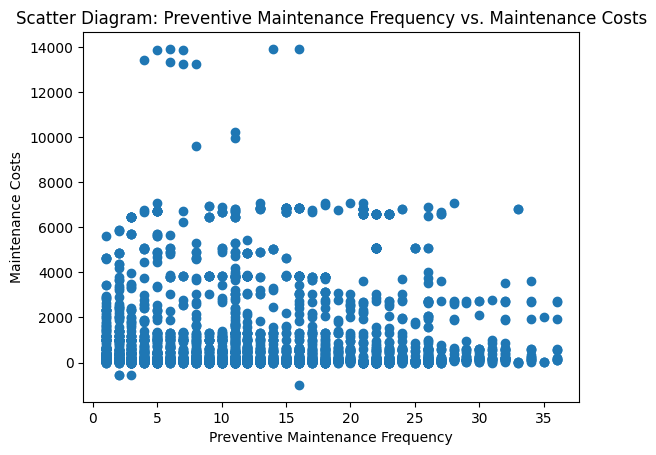

Correlation coefficient:


(0        1
 1        1
 2        1
 3        1
 4        1
         ..
 2975    25
 2976     1
 2977     1
 2978     4
 2979    18
 Name: FrecuenciaUnidad, Length: 2980, dtype: int64,
 0        378.030
 1        994.750
 2        162.459
 3       2323.478
 4        164.030
           ...   
 2975      14.300
 2976       0.000
 2977       0.000
 2978       0.000
 2979       0.000
 Name: TOTAL, Length: 2980, dtype: float64)

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(sayerPreventivo['FrecuenciaUnidad'],sayerPreventivo['TOTAL'])
plt.xlabel('Preventive Maintenance Frequency')
plt.ylabel('Maintenance Costs')
plt.title('Scatter Diagram: Preventive Maintenance Frequency vs. Maintenance Costs')
plt.show()

# Calculate the correlation coefficient
correlation = sayerPreventivo['FrecuenciaUnidad'], sayerPreventivo['TOTAL']
print("Correlation coefficient:" )
correlation

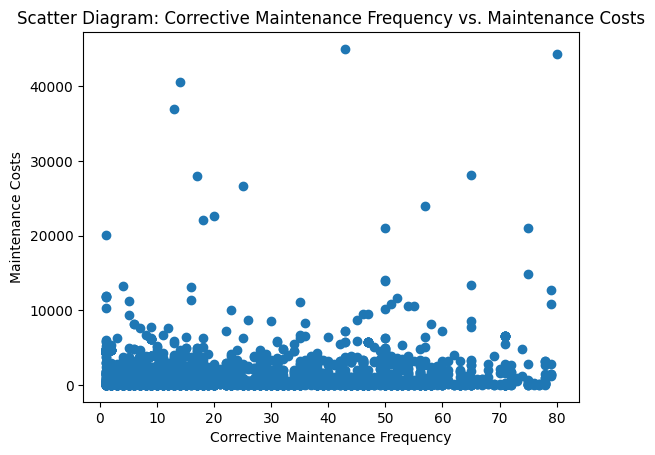

Correlation coefficient:


In [ ]:
import matplotlib.pyplot as plt

plt.scatter(sayerCorrectivo['FrecuenciaUnidad'],sayerCorrectivo['TOTAL'])
plt.xlabel('Corrective Maintenance Frequency')
plt.ylabel('Maintenance Costs')
plt.title('Scatter Diagram: Corrective Maintenance Frequency vs. Maintenance Costs')
plt.show()

# Calculate the correlation coefficient
correlation = sayerCorrectivo['FrecuenciaUnidad'], sayerCorrectivo['TOTAL']
print("Correlation coefficient:" )

**3.) Use Regression Analysis to determine if there is a significant relationship
between these variables.**

##Regresión entre pereventivos y costo total de mantenimiento
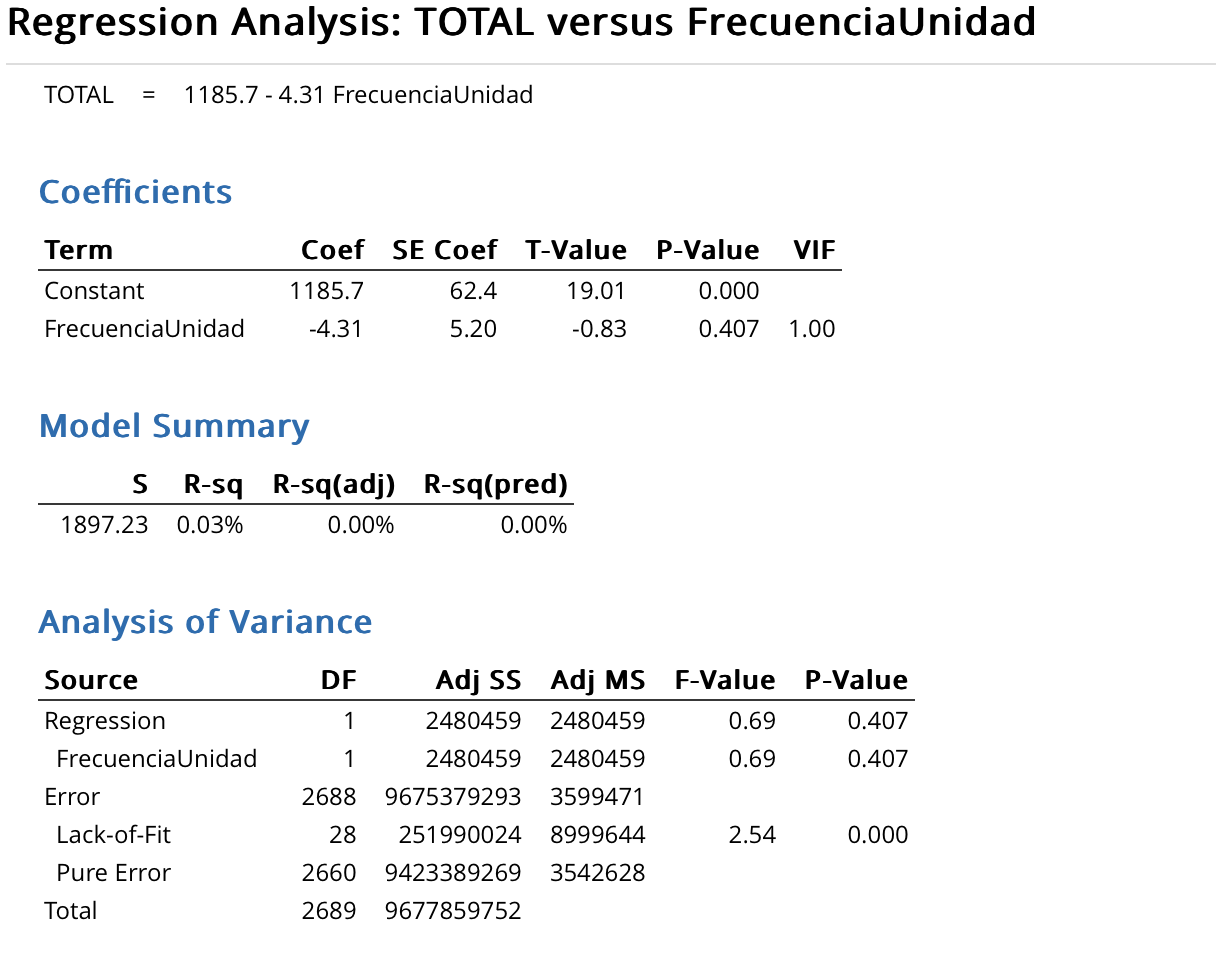

## Regresión entre correctivos y el total de costos de mantenimiento

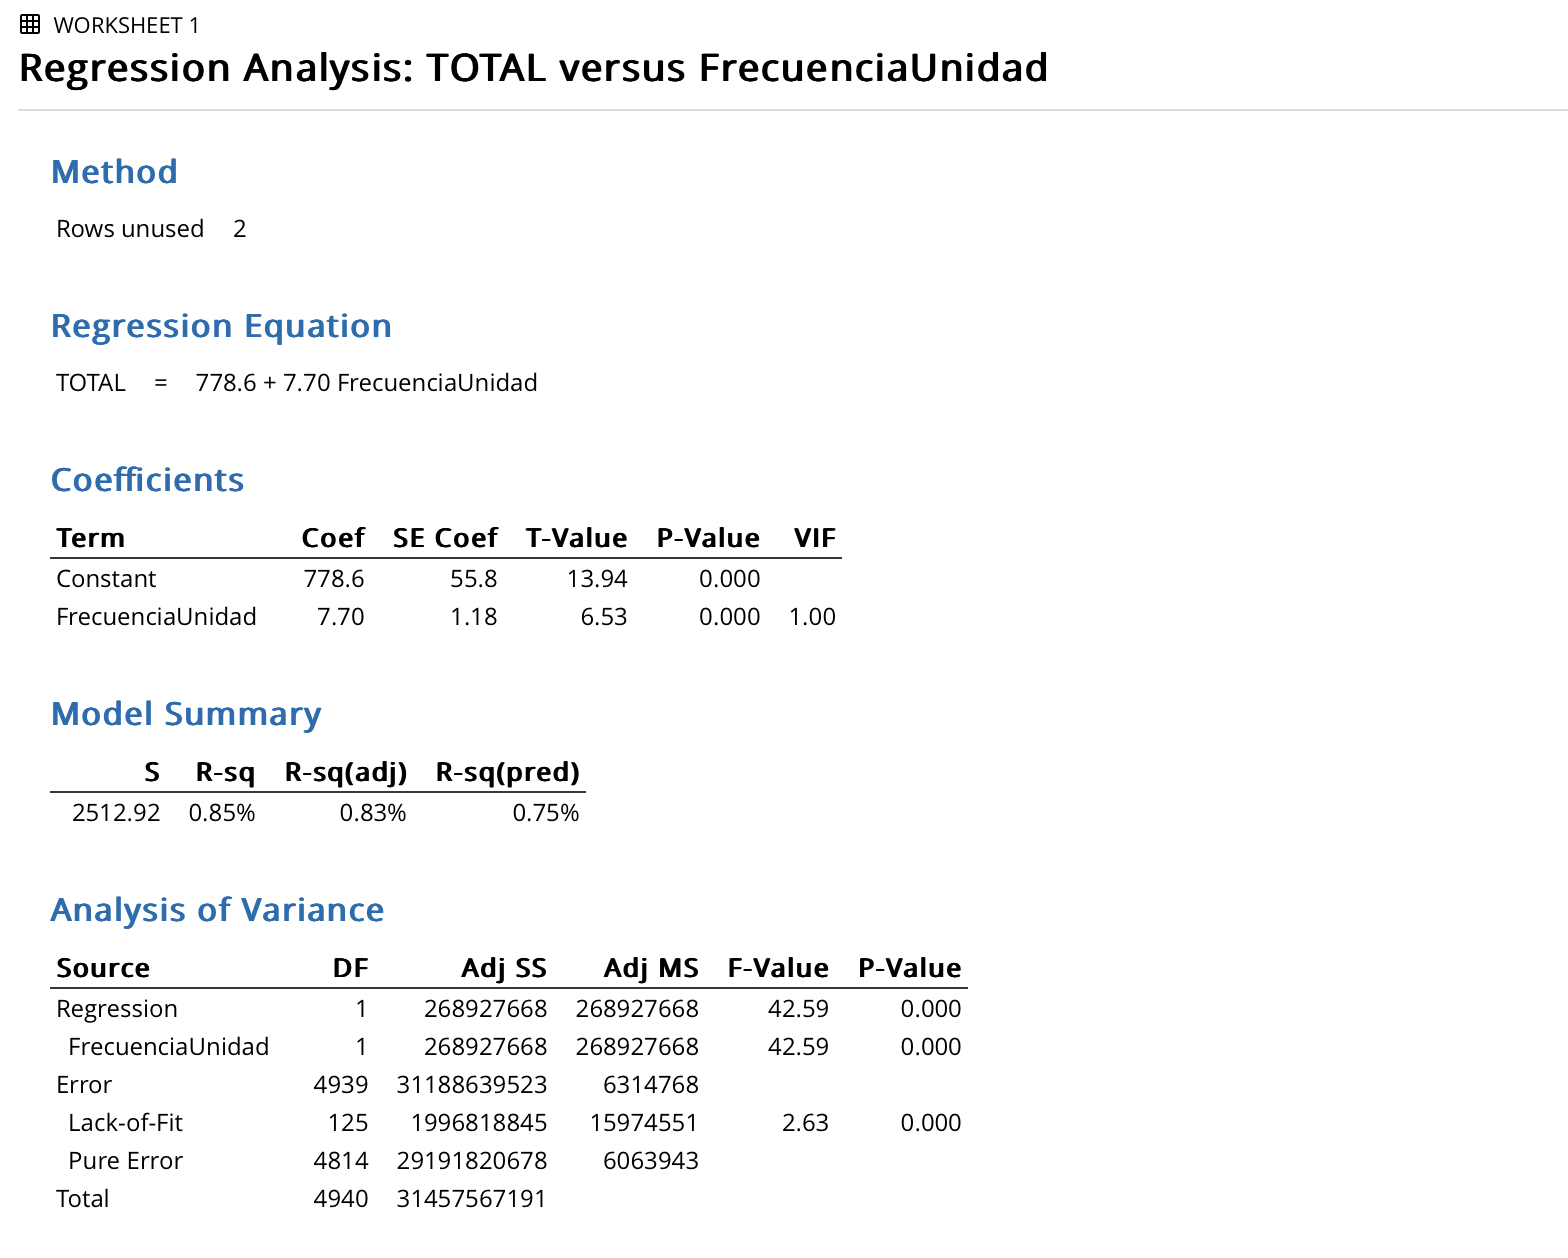

** Despues de haber corrido la regresión lineal entre los mantenimientos correctivos y los mantenimientos preventivos, se observo q

In [ ]:
sayerCorrectivo_2022 = sayerCorrectivo[sayerCorrectivo['anioabierto'] == 2022]
sayerCorrectivo_2022u = sayerCorrectivo_2022.drop_duplicates(subset=['Orderid'], keep='first')
sayerCorrectivo_2022u

,Orderid,Taller,Tallerid,Orden,opened,closed,status,lagdias,laghoras,diacierre,...,diacomplete,mescomplete,aniocomplete,completedate,MECHANIC,CITA,Tipo,year,quarter,FrecuenciaUnidad
0,169137,QRO,QRO-00032562,244708.0,2022-01-03 13:34:00.000,2022-02-10 15:18:00.000,CLOSED,38.0,914.0,10.0,...,10.0,February,2022.0,2022-10-02 15:18:00,NaN,CON CITA,Correctivo,2022.0,4.0,1
6,169344,SAYER APASEO,SAAP-0000448,NaN,2022-01-05 10:12:00.000,2022-01-14 11:15:00.000,CLOSED,9.0,217.0,14.0,...,14.0,January,2022.0,NaT,NaN,SIN CITA,Correctivo,NaN,NaN,1
7,169573,QRO,QRO-00032635,337578.0,2022-01-06 16:05:00.000,2022-01-07 17:28:00.000,CLOSED,1.0,25.0,7.0,...,7.0,January,2022.0,2022-07-01 17:28:00,NaN,EXPRES,Correctivo,2022.0,3.0,1
9,169632,SAYER APASEO,SAAP-0000463,NaN,2022-01-07 10:02:00.000,2022-01-07 15:35:00.000,CLOSED,0.0,5.0,7.0,...,7.0,January,2022.0,2022-07-01 15:35:00,NaN,,Correctivo,2022.0,3.0,1
10,169638,SAYER APASEO,SAAP-0000465,NaN,2022-01-07 10:07:00.000,2022-01-21 13:41:00.000,CLOSED,14.0,339.0,21.0,...,21.0,January,2022.0,NaT,NaN,,Correctivo,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3068,227895,TA,TA-000014580,NaN,2022-11-10 11:02:00.000,2022-11-10 12:39:00.000,CLOSED,0.0,1.0,10.0,...,10.0,November,2022.0,2022-10-11 12:39:00,MECHANIC,NaN,Correctivo,2022.0,4.0,5
3069,227977,TA,TA-000014584,NaN,2022-11-10 12:37:00.000,2022-11-10 14:25:00.000,CLOSED,0.0,2.0,10.0,...,10.0,November,2022.0,2022-10-11 14:25:00,MECHANIC,NaN,Correctivo,2022.0,4.0,6
3070,233803,TA,TA-000015029,531871.0,2022-12-10 16:49:00.000,2022-12-10 16:52:00.000,CLOSED,0.0,0.0,10.0,...,10.0,December,2022.0,2022-10-12 16:52:00,MECHANIC,NaN,Correctivo,2022.0,4.0,26
3071,233804,TA,TA-000015030,610567.0,2022-12-10 16:50:00.000,2022-12-23 11:50:00.000,CLOSED,13.0,307.0,23.0,...,23.0,December,2022.0,NaT,MECHANIC,NaN,Correctivo,NaN,NaN,27


In [ ]:
sayerCorrectivo_2023 = sayerCorrectivo[sayerCorrectivo['anioabierto'] == 2023]
sayerCorrectivo_2023u = sayerCorrectivo_2023.drop_duplicates(subset=['Orderid'], keep='first')
sayerCorrectivo_2023u

,Orderid,Taller,Tallerid,Orden,opened,closed,status,lagdias,laghoras,diacierre,...,diacomplete,mescomplete,aniocomplete,completedate,MECHANIC,CITA,Tipo,year,quarter,FrecuenciaUnidad
1011,238378,QRO,QRO-00039591,317285.0,2023-01-06 09:50:00.000,2023-01-06 13:48:00.000,CLOSED,0.0,4.0,6.0,...,6.0,January,2023.0,2023-06-01 13:48:00,NaN,SIN CITA,Correctivo,2023.0,2.0,42
1013,238680,TA,TA-000015431,496658.0,2023-01-08 22:44:00.000,2023-01-08 22:49:00.000,CLOSED,0.0,0.0,8.0,...,8.0,January,2023.0,2023-08-01 22:49:00,NaN,EXPRES,Correctivo,2023.0,3.0,14
1014,238752,QRO,QRO-00039656,496658.0,2023-01-09 11:10:00.000,2023-01-09 16:59:00.000,CLOSED,0.0,5.0,9.0,...,9.0,January,2023.0,2023-09-01 16:59:00,NaN,SIN CITA,Correctivo,2023.0,3.0,15
1018,239108,QRO,QRO-00039687,317285.0,2023-01-10 12:11:00.000,2023-01-10 12:24:00.000,CLOSED,0.0,0.0,10.0,...,10.0,January,2023.0,2023-10-01 12:24:00,NaN,SIN CITA,Correctivo,2023.0,4.0,43
1020,239124,QRO,QRO-00039690,610568.0,2023-01-10 12:24:00.000,2023-01-10 12:27:00.000,CLOSED,0.0,0.0,10.0,...,10.0,January,2023.0,2023-10-01 12:27:00,NaN,SIN CITA,Correctivo,2023.0,4.0,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3080,258116,QRO,QRO-00041084,393600.0,2023-05-05 11:52:00.000,2023-05-08 13:36:00.000,CLOSED,3.0,74.0,8.0,...,8.0,May,2023.0,2023-08-05 13:36:00,MECHANIC,NaN,Correctivo,2023.0,3.0,53
3081,259238,QRO,QRO-00041225,481199.0,2023-05-13 08:32:00.000,2023-05-13 12:31:00.000,CLOSED,0.0,4.0,13.0,...,13.0,May,2023.0,NaT,MECHANIC,NaN,Correctivo,NaN,NaN,34
3082,268361,TA,TA-000017388,NaN,2023-07-20 08:33:00.000,2023-07-24 11:56:00.000,CLOSED,4.0,99.0,24.0,...,24.0,July,2023.0,NaT,MECHANIC,NaN,Correctivo,NaN,NaN,4
3083,272123,TA,TA-000017589,NaN,2023-08-15 19:11:00.000,2023-08-15 21:04:00.000,CLOSED,0.0,2.0,15.0,...,15.0,August,2023.0,NaT,MECHANIC,NaN,Correctivo,NaN,NaN,17


In [ ]:
sayerCorrectivo_2024 = sayerCorrectivo[sayerCorrectivo['anioabierto'] == 2024]
sayerCorrectivo_2024u = sayerCorrectivo_2024.drop_duplicates(subset=['Orderid'], keep='first')
sayerCorrectivo_2024u

,Orderid,Taller,Tallerid,Orden,opened,closed,status,lagdias,laghoras,diacierre,...,diacomplete,mescomplete,aniocomplete,completedate,MECHANIC,CITA,Tipo,year,quarter,FrecuenciaUnidad
2187,292075,QRO,QRO-00044284,NaN,2024-01-03 10:47:00.000,2024-01-04 12:46:00.000,CLOSED,1.0,26.0,4.0,...,4.0,January,2024.0,2024-04-01 12:46:00,NaN,CON CITA,Correctivo,2024.0,2.0,4
2188,292089,QRO,QRO-00044285,614421.0,2024-01-03 11:15:00.000,2024-01-08 09:14:00.000,CLOSED,5.0,118.0,8.0,...,8.0,January,2024.0,2024-08-01 09:14:00,NaN,CON CITA,Correctivo,2024.0,3.0,48
2190,292489,QRO,QRO-00044319,492345.0,2024-01-04 14:19:00.000,2024-01-05 17:42:00.000,CLOSED,1.0,27.0,5.0,...,5.0,January,2024.0,2024-05-01 17:42:00,NaN,SIN CITA,Correctivo,2024.0,2.0,47
2211,292553,QRO,QRO-00044323,716441.0,2024-01-09 09:59:00.000,2024-01-09 09:59:00.000,CLOSED,0.0,0.0,9.0,...,9.0,January,2024.0,2024-09-01 09:59:00,NaN,CON CITA,Correctivo,2024.0,3.0,58
2228,293199,QRO,QRO-00044377,608499.0,2024-01-09 16:38:00.000,2024-01-09 17:00:00.000,CLOSED,0.0,1.0,9.0,...,9.0,January,2024.0,2024-09-01 17:00:00,NaN,SIN CITA,Correctivo,2024.0,3.0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3047,324406,SAYER APASEO,SAAP-0007315,NaN,2024-08-27 13:33:00.000,2024-08-28 17:55:00.000,CLOSED,1.0,28.0,28.0,...,28.0,August,2024.0,NaT,NaN,SIN CITA,Correctivo,NaN,NaN,8
3048,324710,SAYER APASEO,SAAP-0007333,NaN,2024-08-29 17:27:00.000,2024-08-29 17:47:00.000,CLOSED,0.0,0.0,29.0,...,29.0,August,2024.0,NaT,NaN,EXPRES,Correctivo,NaN,NaN,20
3049,324769,QRO,QRO-00046337,709325.0,2024-08-30 10:59:00.000,2024-09-02 15:27:00.000,CLOSED,3.0,77.0,2.0,...,30.0,August,2024.0,NaT,NaN,EXPRES,Correctivo,NaN,NaN,58
3085,296481,TA,TA-000019164,726558.0,2024-01-31 05:08:00.000,2024-01-31 05:11:00.000,CLOSED,0.0,0.0,31.0,...,31.0,January,2024.0,NaT,MECHANIC,NaN,Correctivo,NaN,NaN,59


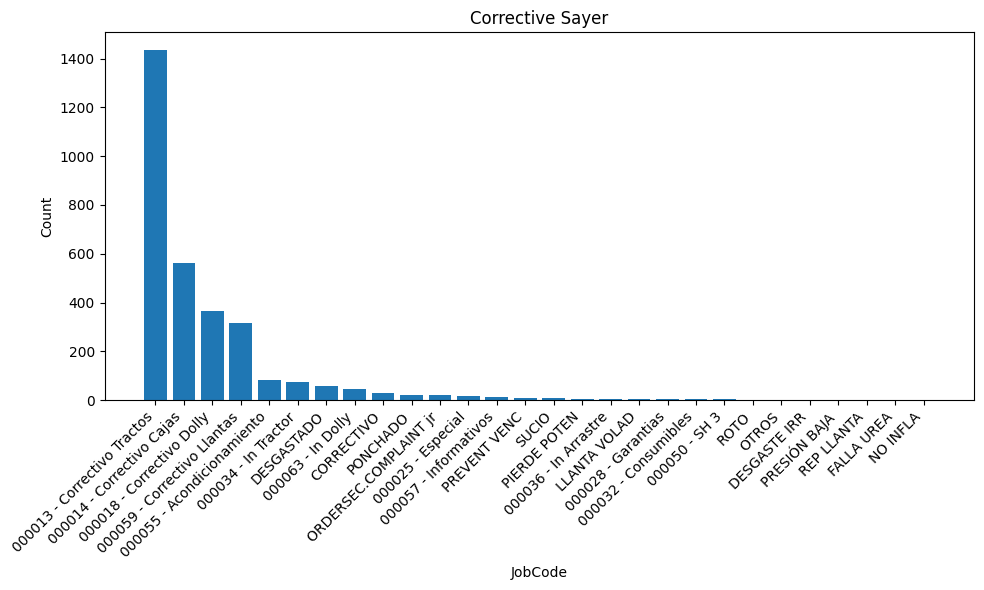

In [ ]:
jobcode_counts = sayerCorrectivo["jobcode"].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(jobcode_counts.index, jobcode_counts.values)
plt.xlabel('JobCode')
plt.ylabel('Count')
plt.title('Corrective Sayer')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

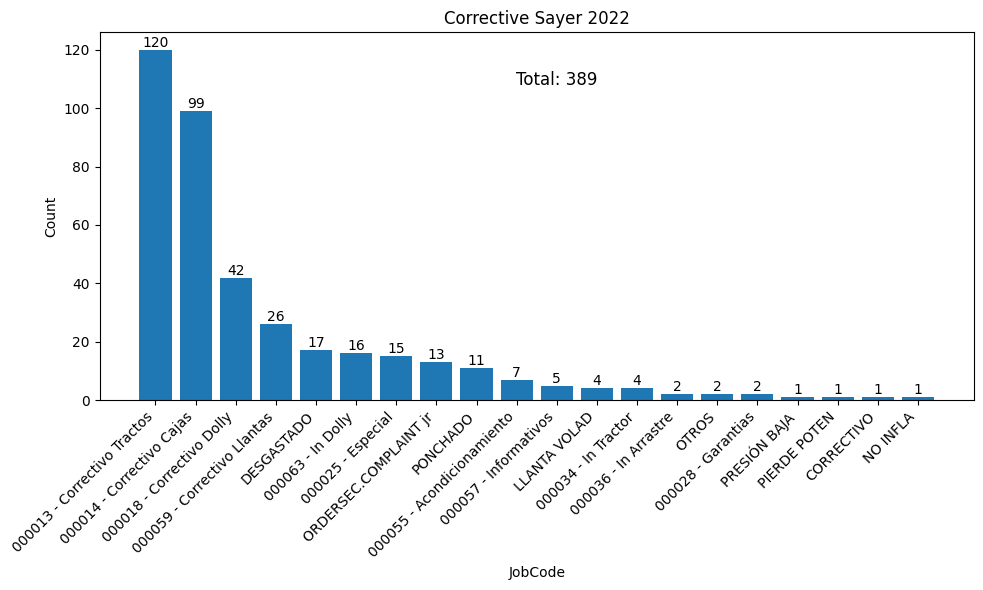

In [ ]:
import matplotlib.pyplot as plt

jobcode_counts = sayerCorrectivo_2022u["jobcode"].value_counts()

plt.figure(figsize=(10, 6))
bars = plt.bar(jobcode_counts.index, jobcode_counts.values)
plt.xlabel('JobCode')
plt.ylabel('Count')
plt.title('Corrective Sayer 2022')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add total count to the plot
total_count = sayerCorrectivo_2022u.shape[0]
plt.text(len(jobcode_counts) / 2, max(jobcode_counts.values) * 0.9,
         f"Total: {total_count}", ha='center', fontsize=12)


for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')


plt.show()

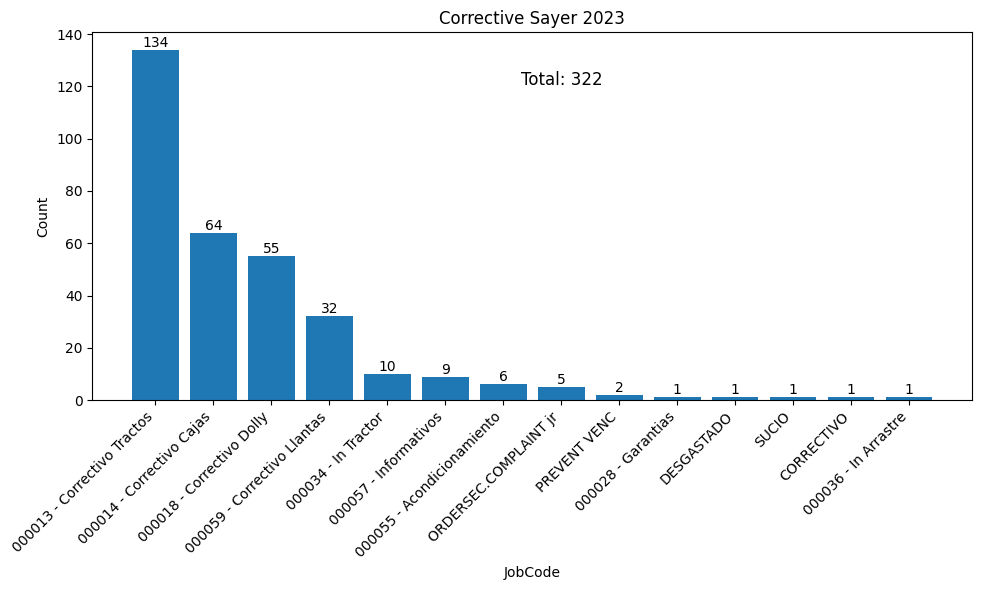

In [ ]:
import matplotlib.pyplot as plt

jobcode_counts = sayerCorrectivo_2023u["jobcode"].value_counts()

plt.figure(figsize=(10, 6))
bars = plt.bar(jobcode_counts.index, jobcode_counts.values)
plt.xlabel('JobCode')
plt.ylabel('Count')
plt.title('Corrective Sayer 2023')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add total count to the plot
total_count = sayerCorrectivo_2023u.shape[0]
plt.text(len(jobcode_counts) / 2, max(jobcode_counts.values) * 0.9,
         f"Total: {total_count}", ha='center', fontsize=12)


for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')


plt.show()

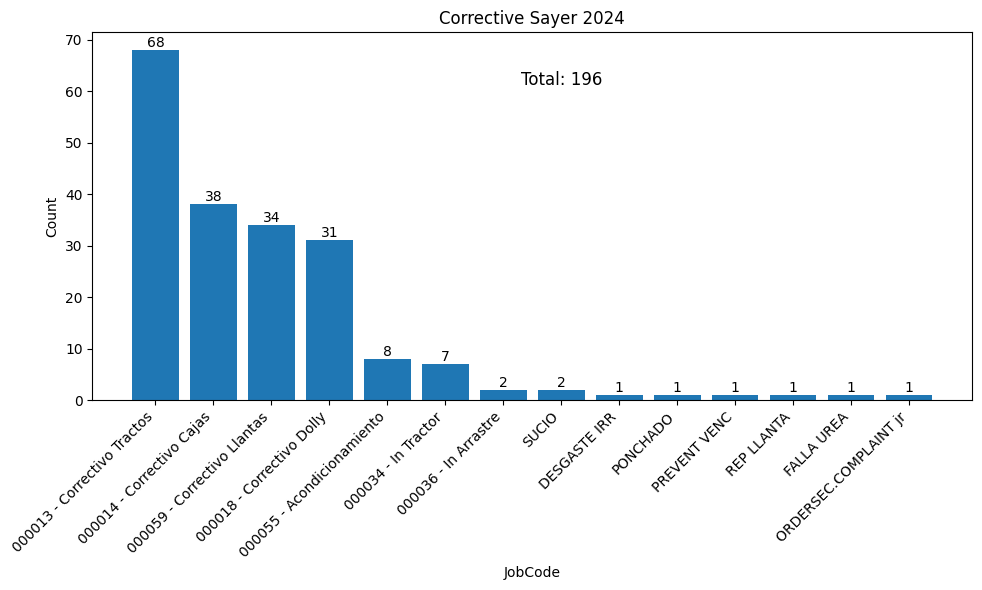

In [ ]:
import matplotlib.pyplot as plt

jobcode_counts = sayerCorrectivo_2024u["jobcode"].value_counts()

plt.figure(figsize=(10, 6))
bars = plt.bar(jobcode_counts.index, jobcode_counts.values)
plt.xlabel('JobCode')
plt.ylabel('Count')
plt.title('Corrective Sayer 2024')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add total count to the plot
total_count = sayerCorrectivo_2024u.shape[0]
plt.text(len(jobcode_counts) / 2, max(jobcode_counts.values) * 0.9,
         f"Total: {total_count}", ha='center', fontsize=12)


for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')


plt.show()

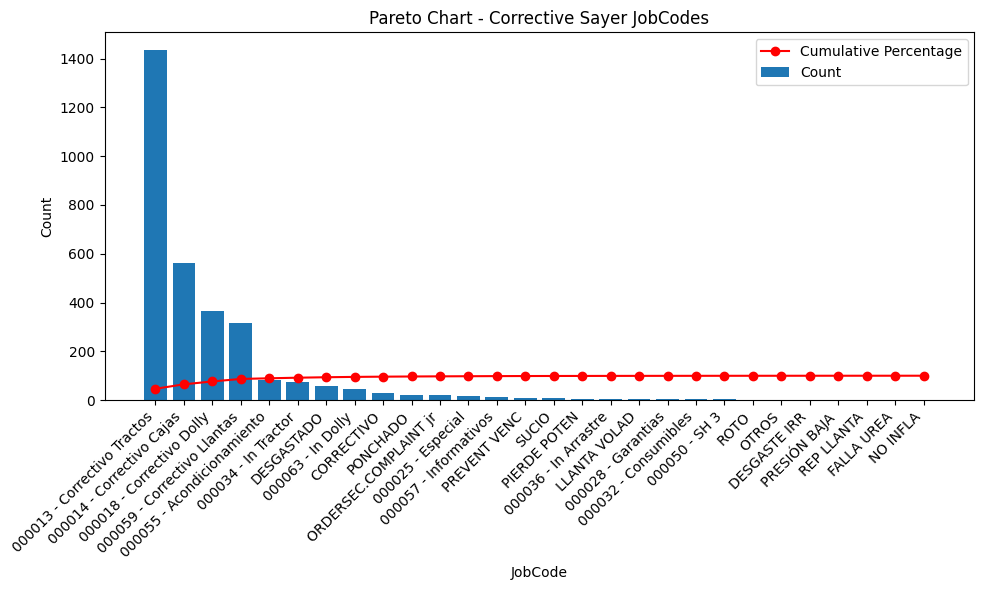

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


jobcode_counts = sayerCorrectivo["jobcode"].value_counts()


cumulative_percentage = (jobcode_counts.cumsum() / jobcode_counts.sum()) * 100


plt.figure(figsize=(10, 6))

plt.bar(jobcode_counts.index, jobcode_counts.values, label='Count')

plt.plot(jobcode_counts.index, cumulative_percentage, marker='o', color='red', label='Cumulative Percentage')


plt.xlabel('JobCode')
plt.ylabel('Count')
plt.title('Pareto Chart - Corrective Sayer JobCodes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add percentage labels to the line chart
#for i, percentage in enumerate(cumulative_percentage):
    #plt.text(i, percentage + 2, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=8)

plt.legend()
plt.show()


<ipython-input-368-6f2cd15bf553>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_cost_by_type_2022 = orderid_TipoTotal_2022.groupby(['mesabierto', 'Tipo'])['TOTAL'].sum().reset_index()


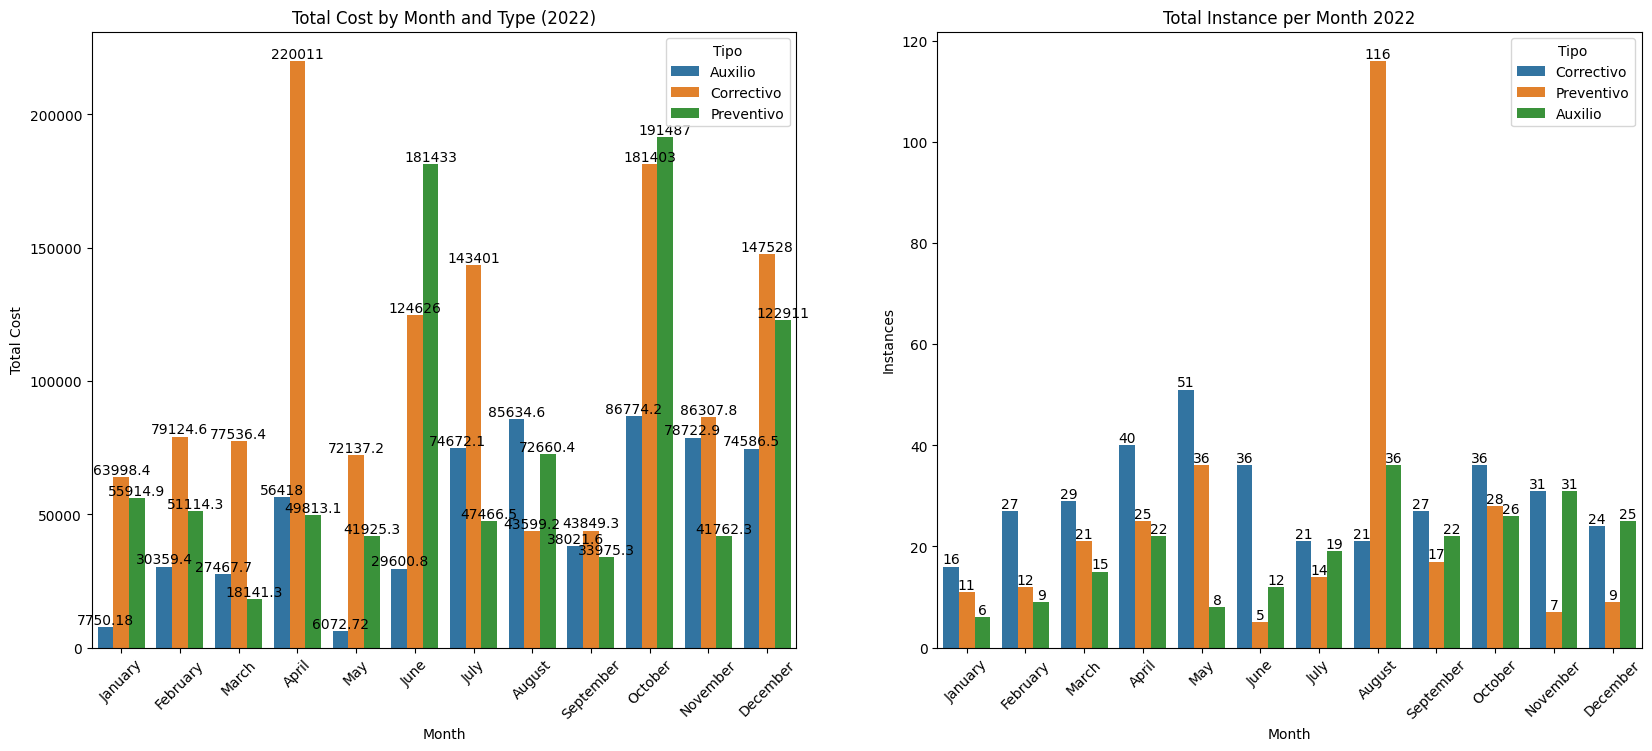

In [ ]:
import seaborn as sns
meses_ordenados = ['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December']
sayer_2022=sayer[sayer['anioabierto']=="2022"]

orderid_TipoTotal_2022 = sayer_2022[['Unidad','Orderid','Tipo','mesabierto','TOTAL']].reset_index()
orderid_TipoTotal_2022 = orderid_TipoTotal_2022.groupby(['Orderid', 'Tipo','mesabierto']).agg({'Unidad': 'first', 'TOTAL': 'sum'}).reset_index()
orderid_TipoTotal_2022.reset_index()
orderid_TipoTotal_2022.dropna(subset=['Unidad'], inplace=True)
orderid_TipoTotal_2022['mesabierto'] = pd.Categorical(orderid_TipoTotal_2022['mesabierto'], categories=meses_ordenados, ordered=True)
monthly_cost_by_type_2022 = orderid_TipoTotal_2022.groupby(['mesabierto', 'Tipo'])['TOTAL'].sum().reset_index()

orderid_Tipo2022=sayer_2022[['Unidad','Orderid','Tipo','mesabierto']].reset_index()

orderid_Tipo2022=orderid_Tipo2022.drop_duplicates(subset=['Orderid'])
orderid_Tipo2022['mesabierto'] = pd.Categorical(orderid_Tipo2022['mesabierto'], categories=meses_ordenados, ordered=True)

fig, axes = plt.subplots(1, 2, figsize=(20, 8))
sns.barplot(x='mesabierto', y='TOTAL', hue='Tipo', data=monthly_cost_by_type_2022,ax=axes[0])
axes[0].set_title('Total Cost by Month and Type (2022)')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Total Cost')
axes[0].tick_params(axis='x', rotation=45)
for container in axes[0].containers:
    axes[0].bar_label(container)
sns.countplot(data=orderid_Tipo2022, x='mesabierto', hue='Tipo')
axes[1].set_title('Total Instance per Month 2022')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Instances')
axes[1].tick_params(axis='x', rotation=45)
for container in axes[1].containers:
    axes[1].bar_label(container)
plt.show()

In [ ]:
orderid_Tipo2022.Tipo.value_counts()

,count
Tipo,
Correctivo,359
Preventivo,301
Auxilio,231


<ipython-input-370-1d41d456e580>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_cost_by_type_2023 = orderid_TipoTotal_2023.groupby(['mesabierto', 'Tipo'])['TOTAL'].sum().reset_index()


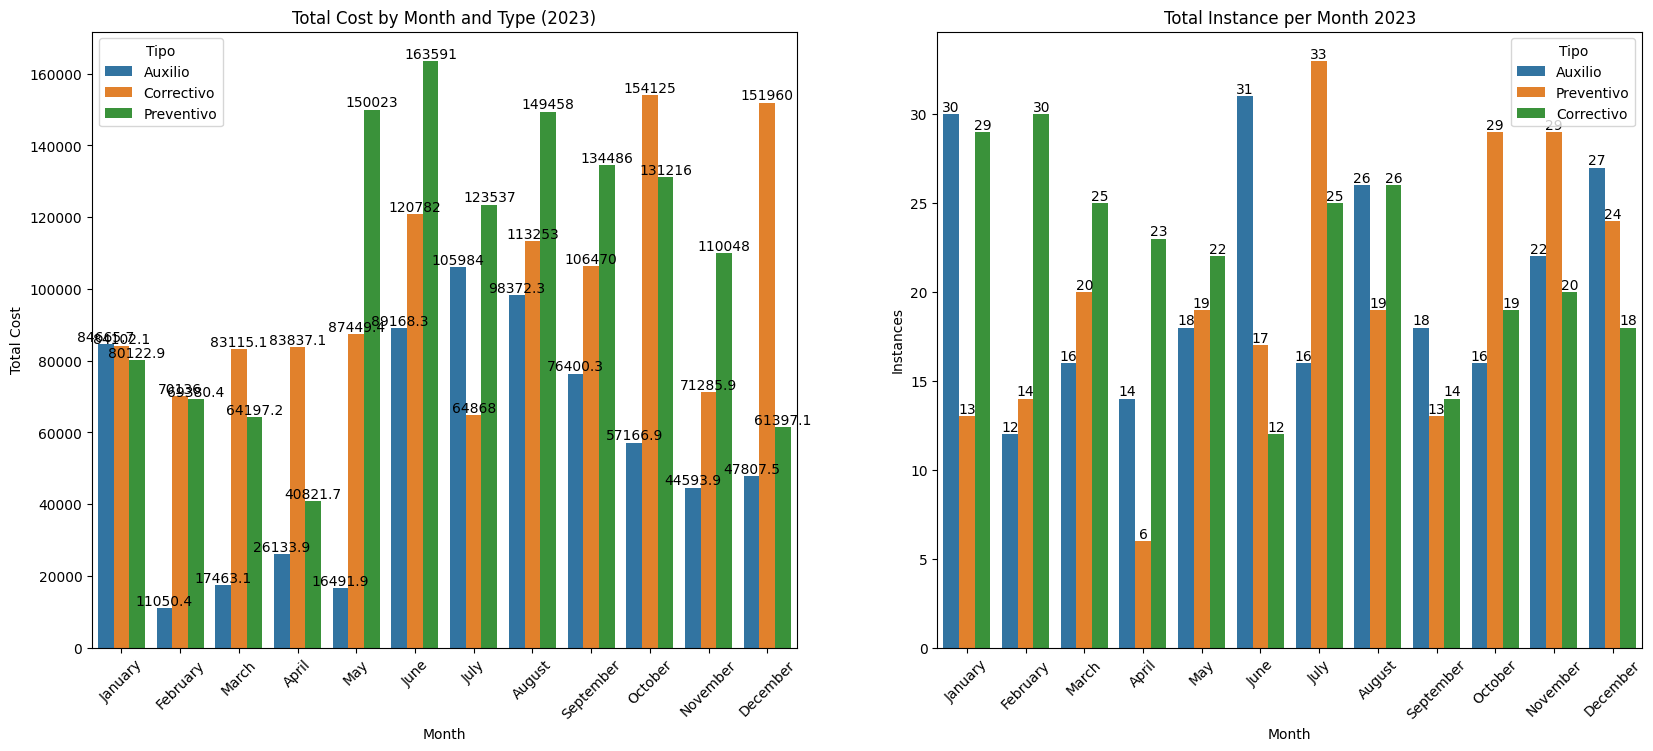

In [ ]:
sayer_2023=sayer[sayer['anioabierto']=="2023"]

orderid_TipoTotal_2023 = sayer_2023[['Unidad','Orderid','Tipo','mesabierto','TOTAL']].reset_index()
orderid_TipoTotal_2023 = orderid_TipoTotal_2023.groupby(['Orderid', 'Tipo','mesabierto']).agg({'Unidad': 'first', 'TOTAL': 'sum'}).reset_index()
orderid_TipoTotal_2023.reset_index()
orderid_TipoTotal_2023.dropna(subset=['Unidad'], inplace=True)
orderid_TipoTotal_2023['mesabierto'] = pd.Categorical(orderid_TipoTotal_2023['mesabierto'], categories=meses_ordenados, ordered=True)
monthly_cost_by_type_2023 = orderid_TipoTotal_2023.groupby(['mesabierto', 'Tipo'])['TOTAL'].sum().reset_index()

orderid_Tipo2023=sayer_2023[['Unidad','Orderid','Tipo','mesabierto']].reset_index()

orderid_Tipo2023=orderid_Tipo2023.drop_duplicates(subset=['Orderid'])
orderid_Tipo2023['mesabierto'] = pd.Categorical(orderid_Tipo2023['mesabierto'], categories=meses_ordenados, ordered=True)

fig, axes = plt.subplots(1, 2, figsize=(20, 8))
sns.barplot(x='mesabierto', y='TOTAL', hue='Tipo', data=monthly_cost_by_type_2023,ax=axes[0])
axes[0].set_title('Total Cost by Month and Type (2023)')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Total Cost')
axes[0].tick_params(axis='x', rotation=45)
for container in axes[0].containers:
    axes[0].bar_label(container)
sns.countplot(data=orderid_Tipo2023, x='mesabierto', hue='Tipo')
axes[1].set_title('Total Instance per Month 2023')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Instances')
axes[1].tick_params(axis='x', rotation=45)
for container in axes[1].containers:
    axes[1].bar_label(container)
plt.show()

<ipython-input-371-e5b2c2083f96>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_cost_by_type_2023 = orderid_TipoTotal_2024.groupby(['mesabierto', 'Tipo'])['TOTAL'].sum().reset_index()


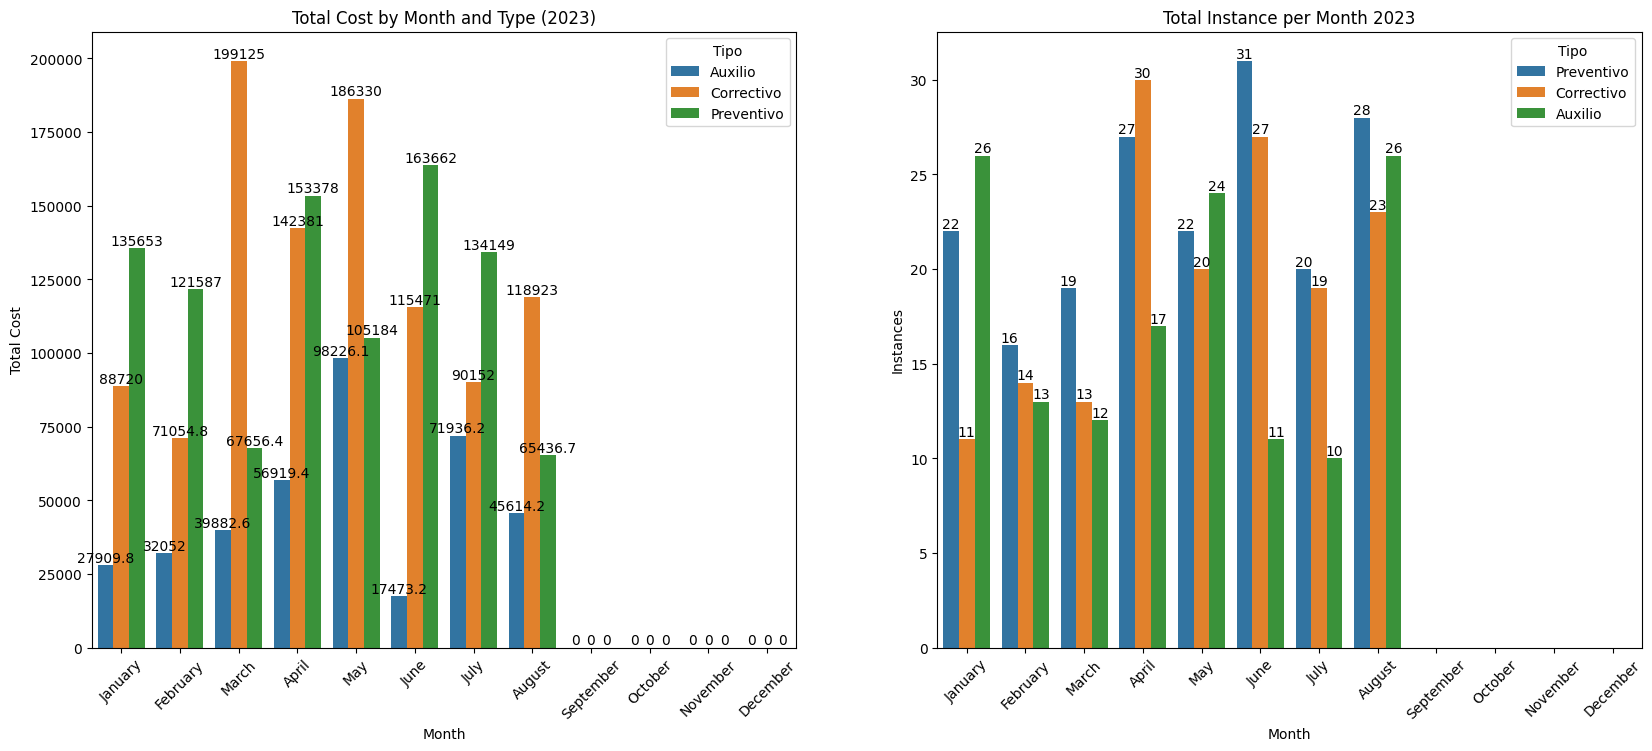

In [ ]:
sayer_2024=sayer[sayer['anioabierto']=="2024"]

orderid_TipoTotal_2024 = sayer_2024[['Unidad','Orderid','Tipo','mesabierto','TOTAL']].reset_index()
orderid_TipoTotal_2024 = orderid_TipoTotal_2024.groupby(['Orderid', 'Tipo','mesabierto']).agg({'Unidad': 'first', 'TOTAL': 'sum'}).reset_index()
orderid_TipoTotal_2024.reset_index()
orderid_TipoTotal_2024.dropna(subset=['Unidad'], inplace=True)
orderid_TipoTotal_2024['mesabierto'] = pd.Categorical(orderid_TipoTotal_2024['mesabierto'], categories=meses_ordenados, ordered=True)
monthly_cost_by_type_2023 = orderid_TipoTotal_2024.groupby(['mesabierto', 'Tipo'])['TOTAL'].sum().reset_index()

orderid_Tipo2024=sayer_2024[['Unidad','Orderid','Tipo','mesabierto']].reset_index()

orderid_Tipo2024=orderid_Tipo2024.drop_duplicates(subset=['Orderid'])
orderid_Tipo2024['mesabierto'] = pd.Categorical(orderid_Tipo2024['mesabierto'], categories=meses_ordenados, ordered=True)

fig, axes = plt.subplots(1, 2, figsize=(20, 8))
sns.barplot(x='mesabierto', y='TOTAL', hue='Tipo', data=monthly_cost_by_type_2023,ax=axes[0])
axes[0].set_title('Total Cost by Month and Type (2023)')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Total Cost')
axes[0].tick_params(axis='x', rotation=45)
for container in axes[0].containers:
    axes[0].bar_label(container)
sns.countplot(data=orderid_Tipo2024, x='mesabierto', hue='Tipo')
axes[1].set_title('Total Instance per Month 2023')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Instances')
axes[1].tick_params(axis='x', rotation=45)
for container in axes[1].containers:
    axes[1].bar_label(container)
plt.show()

In [ ]:
sayer_TOTAL_anio=sayer.groupby(['Tipo', "anioabierto"])['TOTAL'].sum().unstack()
sayer_inst_2022=orderid_Tipo2022.Tipo.value_counts()
sayer_inst_2023=orderid_Tipo2023.Tipo.value_counts()
sayer_inst_2024=orderid_Tipo2024.Tipo.value_counts()
#Hacemos la division entre las dos
sayer_TOTAL_anio['2022'] = sayer_TOTAL_anio['2022'] / sayer_inst_2022
sayer_TOTAL_anio['2023'] = sayer_TOTAL_anio['2023'] / sayer_inst_2023
sayer_TOTAL_anio['2024'] = sayer_TOTAL_anio['2024'] / sayer_inst_2024
sayer_TOTAL_anio

anioabierto,2022,2023,2024
Tipo,,,
Auxilio,2580.435805,2745.115894,2805.852014
Correctivo,3575.271153,4529.975570,6446.858452
Preventivo,3018.616392,5416.431674,5117.333254


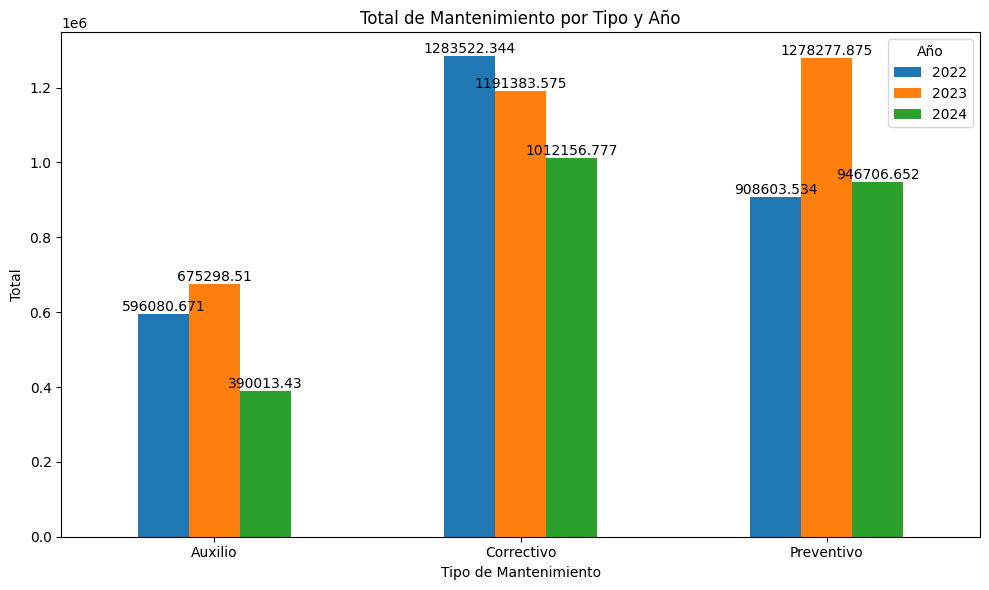

In [ ]:
grouped_data = sayer.groupby(['Tipo', "anioabierto"])['TOTAL'].sum().unstack()


ax = grouped_data.plot(kind='bar', figsize=(10, 6))


plt.xlabel('Tipo de Mantenimiento')
plt.ylabel('Total')
plt.title('Total de Mantenimiento por Tipo y Año')
plt.xticks(rotation=0)
plt.legend(title='Año')
for p in ax.patches:
  ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),

          ha='center',va= "center", xytext=(0, 5), textcoords='offset points')


plt.tight_layout()
plt.show()

In [ ]:
sayerTractor=sayer[sayer['TipoUnidad'].str.contains('TRACTOR', na=False)]
sayerTractor.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4055 entries, 0 to 7497
Data columns (total 53 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Orderid           4055 non-null   int64         
 1   Taller            4055 non-null   object        
 2   Tallerid          4055 non-null   object        
 3   Orden             4055 non-null   float64       
 4   opened            4055 non-null   object        
 5   closed            4055 non-null   object        
 6   status            4055 non-null   object        
 7   lagdias           4055 non-null   float64       
 8   laghoras          4055 non-null   float64       
 9   diacierre         4055 non-null   object        
 10  mescierre         4055 non-null   object        
 11  aniocierre        4055 non-null   object        
 12  diaabierto        4055 non-null   object        
 13  mesabierto        4055 non-null   object        
 14  anioabierto       4055 non-nu

In [ ]:
sayerDolly=sayer[sayer['TipoUnidad'].str.contains('DOLLY', na=False)]
sayerDolly.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1077 entries, 36 to 7491
Data columns (total 53 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Orderid           1077 non-null   int64         
 1   Taller            1077 non-null   object        
 2   Tallerid          1077 non-null   object        
 3   Orden             0 non-null      float64       
 4   opened            1077 non-null   object        
 5   closed            1077 non-null   object        
 6   status            1077 non-null   object        
 7   lagdias           1077 non-null   float64       
 8   laghoras          1077 non-null   float64       
 9   diacierre         1077 non-null   object        
 10  mescierre         1077 non-null   object        
 11  aniocierre        1077 non-null   object        
 12  diaabierto        1077 non-null   object        
 13  mesabierto        1077 non-null   object        
 14  anioabierto       1077 non-n

In [ ]:
sayer.TipoUnidad.value_counts()

,count
TipoUnidad,
TRACTOR,4055
TRAILER,2366
DOLLY,1077


## Regresión múltiple

In [ ]:
import statsmodels.formula.api as sm
modelc = sm.ols('TOTAL ~ COMPCODE + NumParte + CHGAMT + DESCRIP', data=sayerCorrectivo).fit()
print(modelc.summary())


                            OLS Regression Results                            
Dep. Variable:                  TOTAL   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     84.39
Date:                Fri, 18 Oct 2024   Prob (F-statistic):               0.00
Time:                        22:13:34   Log-Likelihood:                -17127.
No. Observations:                2260   AIC:                         3.538e+04
Df Residuals:                    1698   BIC:                         3.859e+04
Df Model:                         561                                         
Covariance Type:            nonrobust                                         
                                                                                                                                                                                                                  

                            OLS Regression Results                            
Dep. Variable:                  TOTAL   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     72.48
Date:                Fri, 18 Oct 2024   Prob (F-statistic):               0.00
Time:                        22:13:37   Log-Likelihood:                -17262.
No. Observations:                2229   AIC:                         3.517e+04
Df Residuals:                    1908   BIC:                         3.700e+04
Df Model:                         320                                         
Covariance Type:            nonrobust                                         
                                                                                                                                          coef    std err          t      P>|t|      [0.025      0.975]
----------

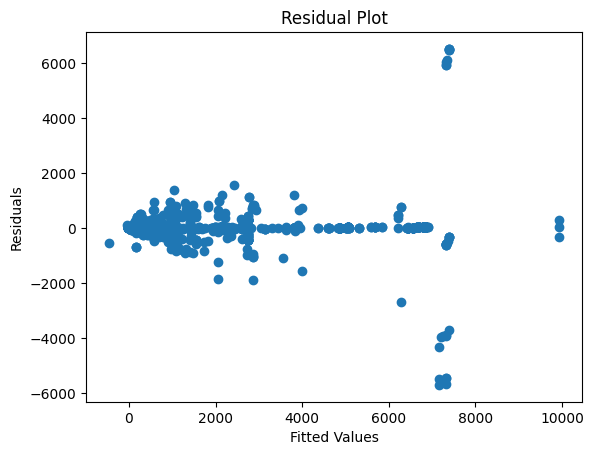

In [ ]:

modelm = sm.ols(' TOTAL ~ COMPCODE + NumParte + CHGAMT + DESCRIP ', data=sayerPreventivo).fit()
print(modelm.summary())

#Residual Analysis:
plt.scatter(modelm.fittedvalues, modelm.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


**4.) Perform a logistic regression analysis to predict the likelihood of unplanned
failures based on vehicle age and mileage**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

# 1. Define Target Variable:
sayerPreventivo.loc[:, 'UnplannedFailure'] = np.where(sayerPreventivo['Tipo'].str.contains('CORRECTIVO', na=False), 1, 0)

# 2. Select Features:
X = sayerPreventivo[['aniounidad']]
y = sayerPreventivo['UnplannedFailure']

# 3. Split Data:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train Logistic Regression Model:
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

print("\nCoeficientes de la regresión logística:", model.coef_)
print("Intercepción (ordenada en el origen):", model.intercept_)

# 5. Make Predictions:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva (UnplannedFailure = 1)

# 6. Evaluate Model Performance:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

confusion = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", confusion)

# 7. ROC Curve and AUC:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print("\nAUC (Area Under Curve):", auc)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

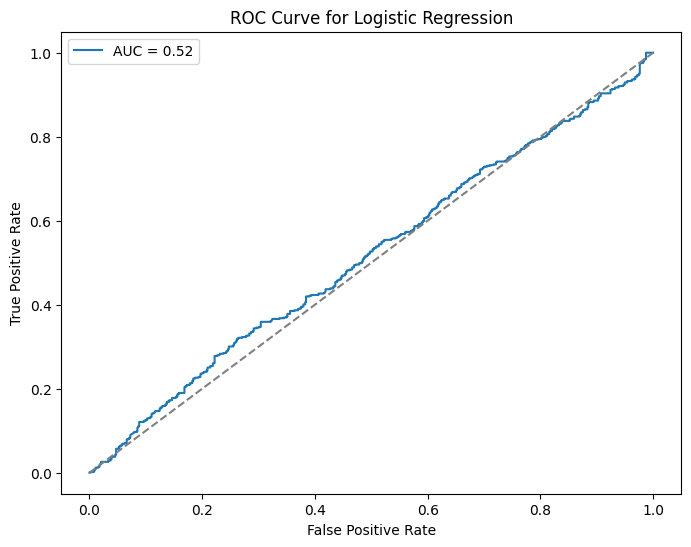

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


# Create a new column 'Tipo_binario' where 'Correctivo' is 0 and 'Preventivo' is 1.
sayer['Tipo_binario'] = sayer['Tipo'].map({'Correctivo': 0, 'Preventivo': 1})

# ----> START: Handle NaN values in 'Tipo_binario'
# Remove rows with NaN values in 'Tipo_binario'
sayer = sayer.dropna(subset=['Tipo_binario'])
# Alternatively, you could fill NaN values with a specific value (e.g., -1):
# sayer['Tipo_binario'] = sayer['Tipo_binario'].fillna(-1)
# ----> END

# Define your features (X) and target (y).
X = sayer[['FrecuenciaUnidad', 'TOTAL']]
y = sayer['Tipo_binario']


# Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create and train the logistic regression model.
model = LogisticRegression()
model.fit(X_train, y_train)


# Predict probabilities for the test set.
y_probs = model.predict_proba(X_test)[:, 1]


# Calculate the ROC curve.
fpr, tpr, thresholds = roc_curve(y_test, y_probs)


# Calculate the AUC (Area Under the Curve).
auc = roc_auc_score(y_test, y_probs)


# Plot the ROC curve.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.show()

**5.) Interpret the Regression coefficients to understand the impact of Age and
Mileage on Failure probability.**

In [ ]:
# Diferencia de fechas
sayer.head()

NameError: name 'sayer' is not defined